<h1 style="color:darkolivegreen;font-weight:800;">
    Building Agentic Apps: ArangoDB, NVIDIA cuGraph, and NetworkX Hackathon
</h1>

<br>

<p align="center">
    <img src="https://drive.google.com/uc?id=1F0G_RXHNGCJT6t_DEdds_fEcixbd_kO3" style="height: 50px;">
</p>


# Overview

The dream of **ConnectCatalyst** started with a simple yet frustrating reality—*I sent out hundreds of applications, faced rejection after rejection, and got nowhere*. **And I know I’m not alone.** Many qualified job seekers are stuck in the same cycle, where a simple qualification isn’t enough because networking remains a mystery. I want ConnectCatalyst to be the breakthrough that levels the playing field, transforming networking from a guessing game into a strategic advantage. Instead of cold outreach and missed opportunities, my Agentic GraphRAG solution pinpoints the right connections—helping job seekers like me find and reach the people who can open doors. By exploiting graph intelligence and context-aware introductions, **ConnectCatalyst** turns weeks of blind applications into warm, high-impact conversations in just days. It’s not just a tool; it’s the catalyst for unlocking real career opportunities.

### **Why GraphRAG?**  
Traditional job searching is broken—applying blindly and sending cold messages rarely works. **Networking is the key**, but most people don’t know **who** to reach out to or **how** to get a response. That’s where **GraphRAG** comes in. By combining **graph intelligence** with **retrieval-augmented generation (RAG)**, we don’t just match job seekers with companies—we **trace optimal connection paths** through their network. **Who knows someone at your dream company? Who is the best person to introduce you?** GraphRAG finds these answers instantly, ensuring every connection is **strategic, warm, and high-impact**—not just another ignored LinkedIn request.  

### **Why ArangoDB Provides the Perfect Foundation**  
To power **GraphRAG**, we needed a **scalable, multi-model database** capable of handling **complex relationships, deep graph queries, and fast retrieval**. **ArangoDB is the perfect fit**—its **native graph storage** allows us to efficiently **map professional connections, uncover hidden networking opportunities, and execute powerful pathfinding algorithms**. With **AQL and NetworkX integration**, we seamlessly combine **graph traversal, analytics, and vector search**, ensuring every query is optimized for **speed, accuracy, and impact**.  

### **My Mission**  
I know firsthand how frustrating the job search can be—**endless applications, ghosted messages, and feeling stuck despite having the skills and experience**. My mission with **ConnectCatalyst** is to **change that reality**. I want to empower job seekers with **AI-driven networking insights**, ensuring they no longer have to rely on luck or blind outreach. **Finding the right job should be about making the right connections—intelligently, strategically, and effortlessly.** ConnectCatalyst isn’t just about helping people find jobs; it’s about **helping them unlock opportunities that were always within reach—just hidden from view**.

# Solution

## Solution Architecture
<p align="center">
    <img src="https://drive.google.com/uc?id=15gcV2EuLKvjWmeVmgSvslI3IABSxpYDT" style="height: 50px;">
</p>

## Function Tools
<p align="center">
    <img src="https://drive.google.com/uc?id=1fQIKEA7hPWqdD5y5xVRuuwy750lvBPck" style="height: 50px;">
</p>


### Step 0: Package Installation & setup

In [ ]:
# 1. Install nx-arangodb via pip
# Github: https://github.com/arangodb/nx-arangodb

!pip install nx-arangodb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2


In [ ]:
# 2. Check if you have an NVIDIA GPU
# Note: If this returns "command not found", then GPU-based algorithms via cuGraph are unavailable

!nvidia-smi
!nvcc --version

Wed Mar  5 18:08:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# 3. Install nx-cugraph via pip
# Note: Only enable this installation if the step above is working!

!pip install nx-cugraph-cu12 --extra-index-url https://pypi.nvidia.com # Requires CUDA-capable GPU

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [ ]:
# 4. Install LangChain & LangGraph

!pip install --upgrade langchain langchain-community langchain-openai langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.31
    Uninstalling langchain-core-0.3.31:
      Successfully uninstalled langchain-core-0.3.31
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.5
    Uninstalling langchain-text-splitters-0.3.5:
      Successfully unins

In [ ]:
# 5. Import the required modules
# Import required modules for graph processing and visualization
import networkx as nx  # Standard graph library for network analysis
import nx_arangodb as nxadb  # NetworkX integration with ArangoDB
from arango import ArangoClient  # Direct client for interacting with ArangoDB

# Import data handling and utility libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Visualization library for graph plotting
from random import randint  # Random number generation
import re  # Regular expressions for text processing
import json  # JSON parsing and handling
from collections import defaultdict  # Efficient dictionary handling for complex data structures

# Import LangGraph and LangChain components for AI-driven graph processing
from langgraph.prebuilt import create_react_agent  # Prebuilt ReAct agent for structured decision-making
from langgraph.checkpoint.memory import MemorySaver  # Memory checkpointing for agent persistence
from langchain_openai import ChatOpenAI  # OpenAI-powered language model integration
from langchain_community.graphs import ArangoGraph  # LangChain's ArangoDB graph utilities
from langchain_community.chains.graph_qa.arangodb import ArangoGraphQAChain  # Question-answering over ArangoDB graphs
from langchain_core.tools import tool  # Utility for defining and using AI tools

# Import additional utilities for structured data representation and AI message handling
from typing import Dict, List, Any, TypedDict, Annotated, Union  # Type annotations for better code clarity
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage  # Message types for AI-driven conversations
from langgraph.graph import StateGraph, END, START  # State management for AI-driven graph processing
from langchain.memory import ConversationBufferMemory  # Memory buffer for storing conversation history


[18:08:52 +0000] [INFO]: NetworkX-cuGraph is available.
INFO:nx_arangodb:NetworkX-cuGraph is available.


In [ ]:
# 6. Connect to the ArangoDB database
# TODO: Configure your credentials here!

db = ArangoClient(hosts="http://localhost:8529").db(username="root", password="test", verify=True)

print(db)

<StandardDatabase _system>


### Step 1: Choose & prepare your dataset for NetworkX

This section covers data acquisition and preprocessing for the LinkedIn graph analysis, where multiple CSV files containing profiles, connections, work experiences, educations, and job postings are loaded into pandas DataFrames and cleaned to handle missing values properly before constructing the network.

In [ ]:
# 1. Import the necessary packages and establish datasets directory
from google.colab import drive  # Import Google Drive module for Colab
import json  # JSON handling
import pandas as pd  # Pandas for data manipulation

# Mount Google Drive
drive.mount('/content/drive')

# Change directory to a specific folder in Google Drive
%cd /content/drive/My Drive/data

Mounted at /content/drive
/content/drive/My Drive/data


In [ ]:
# 2. Load LinkedIn dataset files into Pandas DataFrames
profiles_df = pd.read_csv('linkedin_profiles.csv')  # Profile details of LinkedIn users
connections_df = pd.read_csv('linkedin_connections.csv')  # Connection relationships between profiles
work_experiences_df = pd.read_csv('linkedin_work_experiences.csv')  # Job history for each profile

# Replace NaN values with None in work experience data for better handling
work_experiences_df = work_experiences_df.where(pd.notnull(work_experiences_df), None)

# Load education data while ensuring missing values are set to None
educations_df = pd.read_csv('linkedin_educations.csv').where(
    pd.notnull(pd.read_csv('linkedin_educations.csv')), None
)

# Load job postings data
jobs_df = pd.read_csv('linkedin_jobs.csv')

In [ ]:
# 3. Display the first few rows of the profiles DataFrame
profiles_df.head()

profile_id first_name last_name  \
0  42c651c0-a541-464d-bc6c-b39ea8cf718d   Danielle   Johnson   
1  79ce012d-94f4-4f29-a131-844497b78e0f     Joshua    Walker   
2  99845770-8583-4594-8f02-e1aaea508c7a       Jill    Rhodes   
3  8f6b3717-d0e5-4f45-8170-6a957255931c   Patricia    Miller   
4  ccef6c07-e71b-400f-8805-ab6e97b1fcc8     Robert   Johnson   

          full_name                               linkedin_url  \
0  Danielle Johnson   https://linkedin.com/in/danielle-johnson   
1     Joshua Walker      https://linkedin.com/in/joshua-walker   
2       Jill Rhodes            https://linkedin.com/in/jrhodes   
3   Patricia Miller         https://linkedin.com/in/pmiller512   
4    Robert Johnson  https://linkedin.com/in/robert.johnson446   

                             headline          city        country  \
0          Director of Product at IBM  Santa Monica  United States   
1  Principal Data Scientist at NVIDIA       Oakland  United States   
2  IT Support Specialist at Snowflake   Los Angeles  United States   
3   Cybersecurity Specialist at Cisco        Munich        Germany   
4     Engineering Manager at Airtable       Chicago  United States   

                                              skills  \
0                        Vue.js, HTML5, VS Code, BDD   
1              Lua, Snowflake, IntelliJ, Hadoop, RAG   
2  Terraform, Istio, Jenkins, Pulumi, Robotics, E...   
3  Three.js, High-Performance Computing, Xamarin,...   
4  Clojure, Objective-C, Elixir, Kubernetes, Conf...   

                                             summary experience_level  
0  Executive technology professional with extensi...       Leadership  
1  Visionary Principal Data Scientist with 12+ ye...       Leadership  
2  Versatile IT Support Specialist with 3+ years ...              Mid  
3  Experienced Cybersecurity Specialist with deep...           Senior  
4  Tech professional with 5+ years of experience ...              Mid

In [ ]:
# 4. Display the first few rows of the connections DataFrame
connections_df.head()

connection_id                          profile_id_1  \
0  46a18d8d-be75-4140-bde6-da66061754d7  42c651c0-a541-464d-bc6c-b39ea8cf718d   
1  06c3a71b-6ea9-4305-b919-b97290843e69  42c651c0-a541-464d-bc6c-b39ea8cf718d   
2  8c8903d2-7c3f-4bd3-8c72-3da6518d330c  42c651c0-a541-464d-bc6c-b39ea8cf718d   
3  0ca053f1-7cfb-4f3a-988b-aa31b485707f  42c651c0-a541-464d-bc6c-b39ea8cf718d   
4  8ea43f80-7403-4f20-9bf6-b284197da491  42c651c0-a541-464d-bc6c-b39ea8cf718d   

                           profile_id_2  mutual_connections_count  
0  34d844ec-8752-4990-9da9-f93e1fe04daa                         4  
1  fa09ab2c-7863-49f2-b876-6125f18cb679                         0  
2  82bb4905-324b-4504-9003-98beab1e59a3                        27  
3  7f077828-030a-48ff-99c3-feca1aee36f8                         7  
4  baaeafcc-a358-482b-a7d9-e2db50574812                         4

In [ ]:
# 5. Display the first few rows of the work experiences DataFrame
work_experiences_df.head()

experience_id                            profile_id  \
0  2b2c3533-47dd-4c45-813c-23c58608cf9d  42c651c0-a541-464d-bc6c-b39ea8cf718d   
1  ac15553e-af89-40ac-832b-3dc5147f6790  42c651c0-a541-464d-bc6c-b39ea8cf718d   
2  9859bcf6-6bf8-46a4-b0de-128f51cacca2  42c651c0-a541-464d-bc6c-b39ea8cf718d   
3  6d6b743f-e5eb-4275-852a-14541f292d5e  42c651c0-a541-464d-bc6c-b39ea8cf718d   
4  6a81aba9-9d95-4921-af7b-f871adc1e7e1  42c651c0-a541-464d-bc6c-b39ea8cf718d   

                    title   company  start_date    end_date          city  \
0     Director of Product       IBM  2021-02-07  2025-02-16  Santa Monica   
1      Principal Engineer    Replit  2022-01-02  2025-01-16  Santa Monica   
2  Senior Product Manager  Comma.ai  2022-11-12  2024-11-01  Santa Monica   
3      Senior UX Designer   Datadog  2024-03-09  2024-10-05  Santa Monica   
4          Data Scientist   Dropbox  2023-01-26  2024-08-18     Palo Alto   

         country                                        description  \
0  United States  • Refactored legacy code to enhance performanc...   
1  United States  • Refactored monolithic application to enhance...   
2  United States  • Led a team of 4 engineers to complete critic...   
3  United States  • Implemented improvements that improved effic...   
4  United States  • Developed predictive algorithms that enhance...   

  employment_type  
0       Full-time  
1       Full-time  
2       Full-time  
3       Full-time  
4       Full-time

In [ ]:
# 6. Display the first few rows of the educations DataFrame
educations_df.head()

education_id                            profile_id  \
0  ad3d358d-8db0-467c-a4e1-c2c8af77e4a6  42c651c0-a541-464d-bc6c-b39ea8cf718d   
1  34899730-3dff-4277-ba71-e7db6bf520e1  42c651c0-a541-464d-bc6c-b39ea8cf718d   
2  09dd71c9-d074-4c66-a971-8ddee4fc7d6d  42c651c0-a541-464d-bc6c-b39ea8cf718d   
3  d23ed40e-4fca-4d91-92f1-980222e29136  79ce012d-94f4-4f29-a131-844497b78e0f   
4  be709307-d9d3-4a85-9dc6-a8d06a436a73  79ce012d-94f4-4f29-a131-844497b78e0f   

                        institution_name                               degree  \
0                     Harvard University                  Bachelor of Science   
1               Arizona State University  Bachelor of Business Administration   
2                        Rice University                  Bachelor of Science   
3                   Princeton University  Bachelor of Business Administration   
4  University of California, Los Angeles              Bachelor of Engineering   

         field_of_study  start_year  end_year  
0    Parallel Computing        1996      2000  
1   Systems Engineering        1991      1995  
2      Embedded Systems        1985      1989  
3  Software Engineering        2001      2005  
4       Web Development        1995      1999

In [ ]:
# 7. Display the first few rows of the job postings DataFrame
jobs_df.head()

job_id                      job_title  \
0  b0781fe3-f8d8-46d2-8dab-ae6cc214a58b                 Cloud Engineer   
1  bdd32e5e-54e5-4bde-9721-82a19b267a37       Computer Vision Engineer   
2  c1d3d630-b649-4ced-9f08-cefb06391e84             Decision Scientist   
3  db4f14a7-1fd4-4064-995d-eef615e161a6  Business Intelligence Analyst   
4  4c6f91bb-2d3e-4c8f-a348-f9204c702198           Interaction Designer   

            company           city               country  \
0       Blue Origin      Sunnyvale         United States   
1            Retool         Munich               Germany   
2          Calendly  Mountain View         United States   
3  Relativity Space          Dubai  United Arab Emirates   
4  Relativity Space     Menlo Park         United States   

                                         description  \
0  \nBlue Origin is pioneering the next generatio...   
1  \nRetool is a rapidly growing technology compa...   
2  \nCalendly is a rapidly growing technology com...   
3  \nRelativity Space is pushing the boundaries o...   
4  \nRelativity Space is pushing the boundaries o...   

                                     required_skills posting_date   job_type  \
0  PHP, C#, Spring Boot, NestJS, Pulumi, ELK Stac...   2025-02-19  Full-time   
1  PyTorch, Computer Vision, Kotlin, Haskell, Sup...   2025-02-18  Full-time   
2  Hadoop, ONNX, Dask, Haskell, Elixir, C++, Supa...   2025-02-23  Full-time   
3  Ray, TensorFlow, Spark, Perl, Julia, PHP, Dyna...   2024-12-19  Full-time   
4  D3.js, Vue.js, Responsive Design, VS Code, Lin...   2025-01-02  Full-time   

  remote_status industry experience_level  
0        Remote     Tech           Senior  
1        Remote     Tech           Senior  
2        Remote     Tech           Senior  
3        Hybrid     Tech           Senior  
4        Onsite     Tech           Senior

### Step 2: Convert and Load Graph Data into NetworkX

This section demonstrates how to load LinkedIn data into NetworkX by defining profile, company, institution, and job posting nodes with their respective attributes, establishing various relationship edges (connections, employment, education, job postings), and creating targeted visualizations to explore different aspects of the professional network through meaningful subgraphs.

In [ ]:
# 1. Load the dataset into a NetworkX Graph
# Create an undirected graph to represent the LinkedIn network
G = nx.Graph()

# Add profile nodes with attributes (LinkedIn users)
for _, row in profiles_df.iterrows():
    G.add_node(row['profile_id'],  # Unique identifier for each profile
               first_name=row['first_name'],
               last_name=row['last_name'],
               full_name=row['full_name'],
               linkedin_url=row['linkedin_url'],
               headline=row['headline'],  # Professional title
               city=row['city'],
               country=row['country'],
               location=f"{row['city']}, {row['country']}",
               skills=row['skills'].split(','),  # Convert skills string into a list
               summary=row['summary'],  # Profile summary or bio
               experience_level=row['experience_level'],  # Entry, Mid, Senior, etc.
               type='profile')  # Node type identifier

# Add connection edges between profiles (LinkedIn connections)
for _, row in connections_df.iterrows():
    G.add_edge(row['profile_id_1'],  # Profile making the connection
               row['profile_id_2'],  # Connected profile
               mutual_connections_count=row['mutual_connections_count'],  # Number of mutual connections
               type='connection')  # Edge type identifier

# Add company nodes and employment relationships
for _, row in work_experiences_df.iterrows():
    company = row['company']

    # Ensure the company node exists
    if not G.has_node(company):
        G.add_node(company,
                   name=company,
                   type='company')  # Node type identifier

    # Connect profile to company via employment
    G.add_edge(row['profile_id'],
               company,
               title=row['title'],  # Job title
               start_date=row['start_date'],
               end_date=row['end_date'],
               city=row['city'],
               country=row['country'],
               description=row['description'],  # Job responsibilities/achievements
               employment_type=row['employment_type'],  # Full-time, Part-time, etc.
               type='employment')  # Edge type identifier

# Add educational institution nodes and education relationships
for _, row in educations_df.iterrows():
    institution = row['institution_name']

    # Ensure the institution node exists
    if not G.has_node(institution):
        G.add_node(institution,
                   name=institution,
                   type='institution')  # Node type identifier

    # Connect profile to institution via education history
    G.add_edge(row['profile_id'],
               institution,
               degree=row['degree'],  # Degree earned
               field_of_study=row['field_of_study'],  # Major or area of study
               start_year=row['start_year'],
               end_year=row['end_year'],
               years=f"{row['start_year']}-{row['end_year']}",  # Education duration
               type='education')  # Edge type identifier

# Add job posting nodes and connect them to companies
for _, row in jobs_df.iterrows():
    job_id = row['job_id']
    company = row['company']

    # Add job node with attributes
    G.add_node(job_id,
               job_title=row['job_title'],
               company=row['company'],
               city=row['city'],
               country=row['country'],
               location=f"{row['city']}, {row['country']}",
               description=row['description'],  # Job description
               required_skills=row['required_skills'].split(','),  # Convert skills to list
               posting_date=row['posting_date'],
               job_type=row['job_type'],  # Full-time, Part-time, etc.
               remote_status=row['remote_status'],  # Onsite, Remote, Hybrid
               industry=row['industry'],  # Industry category
               experience_level=row['experience_level'],  # Job experience requirement
               type='job')  # Node type identifier

    # Ensure the company node exists
    if not G.has_node(company):
        G.add_node(company,
                   name=company,
                   type='company')  # Node type identifier

    # Connect job posting to the company
    G.add_edge(job_id, company, type='job_posting')  # Edge type identifier

In [ ]:
# 2. Display graph summary (number of nodes and edges)
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Graph created with 1485 nodes and 165781 edges


In [ ]:
# 3. Find Most Connected Profiles (Highest Degree Centrality)
# Calculate degree centrality for profiles
profile_nodes = [node for node, attrs in G.nodes(data=True) if attrs.get('type') == 'profile']
profile_subgraph = G.subgraph(profile_nodes)
degree_centrality = nx.degree_centrality(profile_subgraph)

# Get top 10 most connected profiles
top_connected_profiles = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Most Connected Profiles:")
for profile_id, centrality in top_connected_profiles:
    profile_data = G.nodes[profile_id]
    print(f"{profile_data['full_name']} - Centrality: {centrality:.4f}")

Top 10 Most Connected Profiles:
Chelsea Lee - Centrality: 0.5746
Chelsea Hernandez - Centrality: 0.5606
Hunter Burch - Centrality: 0.5526
Jessica Rose - Centrality: 0.5475
Martha Drake - Centrality: 0.5405
Christopher Fleming - Centrality: 0.5405
Kevin Ferguson - Centrality: 0.5405
Natalie Arroyo - Centrality: 0.5395
Tracy Russell - Centrality: 0.5365
Cynthia Diaz - Centrality: 0.5345


In [ ]:
# 4. Find Most Common Skills Among Profiles
# Extract all skills from profiles
all_skills = []
for node, attrs in G.nodes(data=True):
    if attrs.get('type') == 'profile' and 'skills' in attrs:
        all_skills.extend(attrs['skills'])

# Count skill occurrences
skill_counts = {}
for skill in all_skills:
    skill_counts[skill] = skill_counts.get(skill, 0) + 1

# Get top 15 most common skills
top_skills = sorted(skill_counts.items(), key=lambda x: x[1], reverse=True)[:15]

# Print top 15 most common skills
print("Top 15 Most Common Skills:")
for skill, count in top_skills:
    print(f"{skill}: {count}")

Top 15 Most Common Skills:
 Bitbucket: 61
 MATLAB: 61
 TypeScript: 59
 Scala: 58
 Jira: 57
 Rust: 56
 React: 53
 Swift: 53
 Three.js: 53
 Slack: 52
 Groovy: 51
 Obsidian: 51
 Java: 51
 WebGL: 50
 PWA: 50


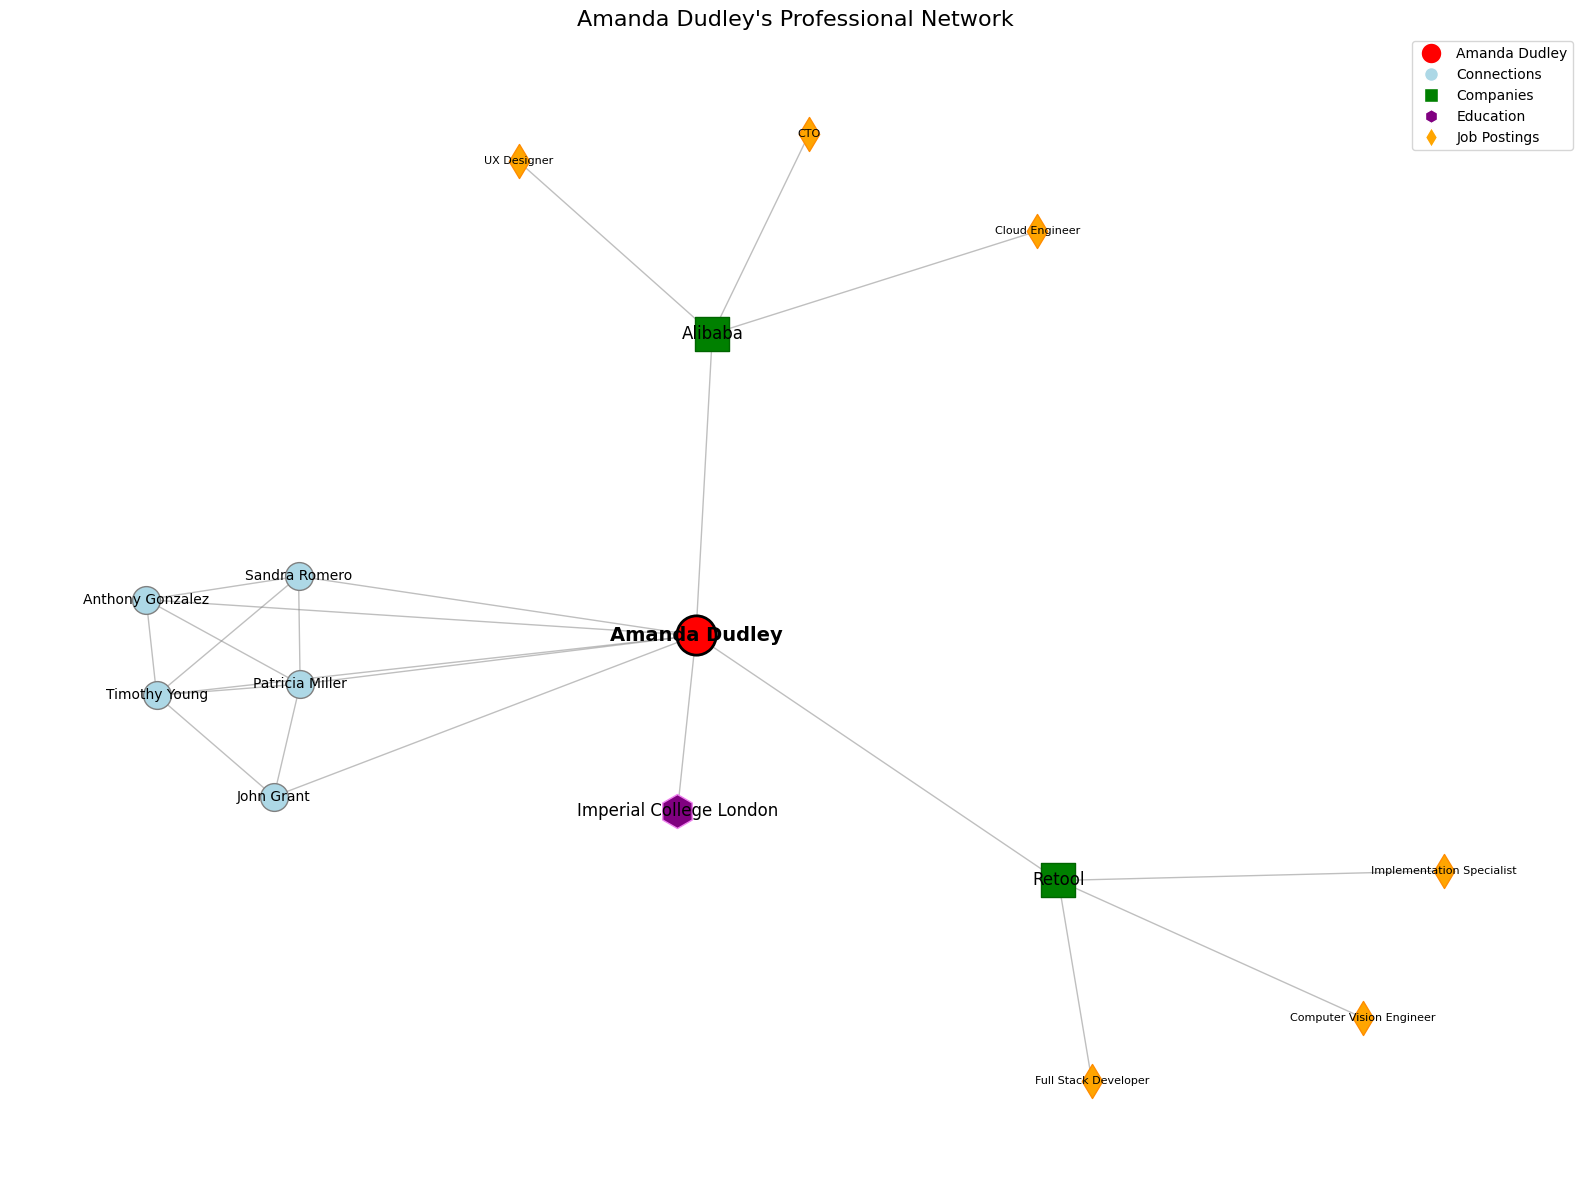

Amanda Dudley's Professional Network:
  - 5 connections shown
  - 2 companies
  - 1 educational institutions
  - 6 job postings related to her companies


In [ ]:
# 5. Visualization for Amanda Dudley's professional network

# Step 1: Find Amanda Dudley's profile node
amanda_id = None
for node, attrs in G.nodes(data=True):
    if attrs.get('type') == 'profile' and attrs.get('full_name') == 'Amanda Dudley':
        amanda_id = node
        break

if not amanda_id:
    print("Amanda Dudley not found in the network")
else:
    # Step 2: Create a focused subgraph around Amanda
    # Start with Amanda's node
    amanda_nodes = [amanda_id]

    # Add Amanda's connections (limit to 5)
    amanda_connections = []
    for neighbor in G.neighbors(amanda_id):
        if G.nodes[neighbor].get('type') == 'profile' and G[amanda_id][neighbor].get('type') == 'connection':
            amanda_connections.append(neighbor)
            if len(amanda_connections) >= 5:  # Limit to 5 connections
                break

    amanda_nodes.extend(amanda_connections)

    # Add companies Amanda has worked for
    amanda_companies = []
    for neighbor in G.neighbors(amanda_id):
        if G.nodes[neighbor].get('type') == 'company' and G[amanda_id][neighbor].get('type') == 'employment':
            amanda_companies.append(neighbor)

    amanda_nodes.extend(amanda_companies)

    # Add educational institutions for Amanda
    amanda_education = []
    for neighbor in G.neighbors(amanda_id):
        if G.nodes[neighbor].get('type') == 'institution' and G[amanda_id][neighbor].get('type') == 'education':
            amanda_education.append(neighbor)

    amanda_nodes.extend(amanda_education)

    # Add job postings for Amanda's companies
    amanda_job_postings = []
    for company in amanda_companies:
        for neighbor in G.neighbors(company):
            if G.nodes[neighbor].get('type') == 'job' and G[company][neighbor].get('type') == 'job_posting':
                amanda_job_postings.append(neighbor)
                if len(amanda_job_postings) >= 3 * len(amanda_companies):  # Limit to 3 jobs per company
                    break

    amanda_nodes.extend(amanda_job_postings)

    # Create the subgraph
    amanda_subgraph = G.subgraph(amanda_nodes)

    # Set up the plot with a larger figure size
    plt.figure(figsize=(16, 12))

    # Use a layout that puts Amanda at the center
    pos = nx.spring_layout(amanda_subgraph, seed=42, k=0.5, iterations=100)

    # Adjust Amanda's position to the center
    center_x = sum(x for x, y in pos.values()) / len(pos)
    center_y = sum(y for x, y in pos.values()) / len(pos)
    pos[amanda_id] = (center_x, center_y)

    # Draw different node types with different colors and sizes

    # Draw Amanda's node (larger and distinct)
    nx.draw_networkx_nodes(amanda_subgraph, pos,
                          nodelist=[amanda_id],
                          node_size=800,
                          node_color='red',
                          edgecolors='black',
                          linewidths=2)

    # Draw Amanda's connections
    nx.draw_networkx_nodes(amanda_subgraph, pos,
                          nodelist=amanda_connections,
                          node_size=400,
                          node_color='lightblue',
                          edgecolors='gray')

    # Draw companies
    nx.draw_networkx_nodes(amanda_subgraph, pos,
                          nodelist=amanda_companies,
                          node_size=600,
                          node_color='green',
                          edgecolors='darkgreen',
                          node_shape='s')  # square nodes for companies

    # Draw educational institutions
    nx.draw_networkx_nodes(amanda_subgraph, pos,
                          nodelist=amanda_education,
                          node_size=600,
                          node_color='purple',
                          edgecolors='violet',
                          node_shape='h')  # hexagon for education

    # Draw job postings
    nx.draw_networkx_nodes(amanda_subgraph, pos,
                          nodelist=amanda_job_postings,
                          node_size=300,
                          node_color='orange',
                          edgecolors='darkorange',
                          node_shape='d')  # diamond for job postings

    # Draw all edges
    nx.draw_networkx_edges(amanda_subgraph, pos,
                          width=1.0,
                          alpha=0.5,
                          edge_color='gray')

    # Add labels
    labels = {}
    for node in amanda_subgraph.nodes():
        if node == amanda_id:
            # Amanda's label
            labels[node] = G.nodes[node]['full_name']
        elif node in amanda_connections:
            # Connection labels - just first and last name
            labels[node] = G.nodes[node]['full_name']
        elif node in amanda_companies:
            # Company labels
            labels[node] = G.nodes[node]['name']
        elif node in amanda_education:
            # Education labels
            labels[node] = G.nodes[node]['name']
        elif node in amanda_job_postings:
            # Job posting labels - just title
            labels[node] = G.nodes[node]['job_title']

    # Draw labels with different font sizes based on node type
    nx.draw_networkx_labels(amanda_subgraph, pos,
                           labels={amanda_id: labels[amanda_id]},
                           font_size=14,
                           font_weight='bold')

    # Fixed the unpacking error by providing labels separately for each node type
    nx.draw_networkx_labels(amanda_subgraph, pos,
                           labels={node: labels[node] for node in amanda_connections if node in labels},
                           font_size=10)

    nx.draw_networkx_labels(amanda_subgraph, pos,
                           labels={node: labels[node] for node in amanda_companies if node in labels},
                           font_size=12)

    nx.draw_networkx_labels(amanda_subgraph, pos,
                           labels={node: labels[node] for node in amanda_education if node in labels},
                           font_size=12)

    nx.draw_networkx_labels(amanda_subgraph, pos,
                           labels={node: labels[node] for node in amanda_job_postings if node in labels},
                           font_size=8)

    # Add a legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=15, label='Amanda Dudley'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10, label='Connections'),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='green', markersize=10, label='Companies'),
        plt.Line2D([0], [0], marker='h', color='w', markerfacecolor='purple', markersize=10, label='Education'),
        plt.Line2D([0], [0], marker='d', color='w', markerfacecolor='orange', markersize=10, label='Job Postings')
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    # Add title and remove axes
    plt.title("Amanda Dudley's Professional Network", size=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Print some information about Amanda's network
    print(f"Amanda Dudley's Professional Network:")
    print(f"  - {len(amanda_connections)} connections shown")
    print(f"  - {len(amanda_companies)} companies")
    print(f"  - {len(amanda_education)} educational institutions")
    print(f"  - {len(amanda_job_postings)} job postings related to her companies")

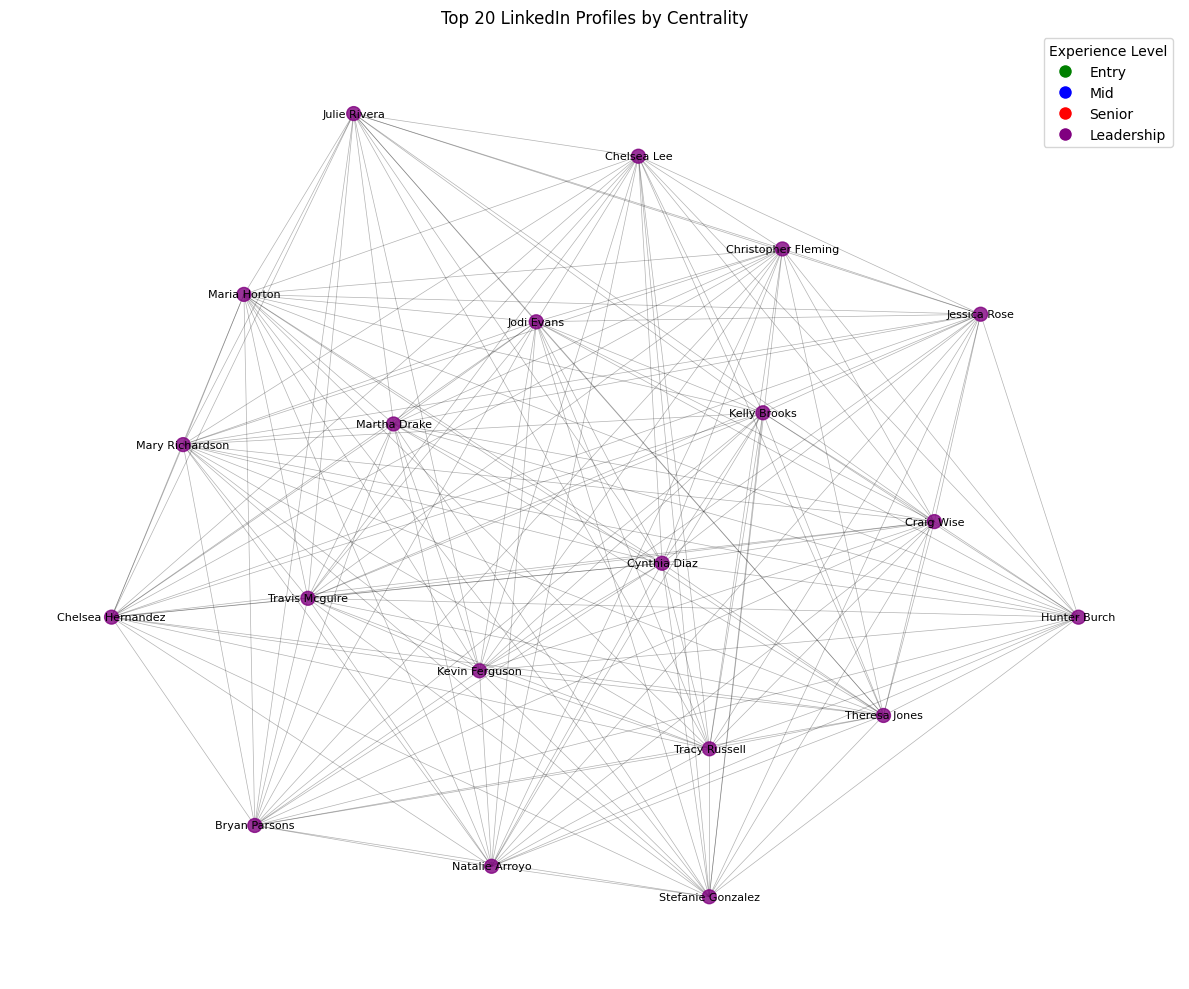

In [ ]:
# 6. Visualize Profiles and Their Connections
# Create a smaller subgraph of profiles for visualization
# Select top 20 profiles by degree centrality
profile_nodes = [node for node, attrs in G.nodes(data=True) if attrs.get('type') == 'profile']
profile_subgraph = G.subgraph(profile_nodes)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(profile_subgraph)
top_profiles = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
top_profile_nodes = [node for node, _ in top_profiles]

# Create visualization subgraph with only these top profiles
viz_subgraph = G.subgraph(top_profile_nodes)

# Set up the plot
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(viz_subgraph, seed=42)  # Layout algorithm

# Node colors based on experience level
color_map = {
    'Entry': 'green',
    'Mid': 'blue',
    'Senior': 'red',
    'Leadership': 'purple'
}

# Assign colors to nodes based on experience level
node_colors = []
for node in viz_subgraph.nodes():
    experience = G.nodes[node].get('experience_level', 'Unknown')
    color = color_map.get(experience, 'gray')
    node_colors.append(color)

# Draw the network
nx.draw_networkx_nodes(viz_subgraph, pos, node_size=100, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(viz_subgraph, pos, width=0.5, alpha=0.3)

# Add labels to a subset of nodes
top_viz_profiles = sorted(viz_subgraph.degree, key=lambda x: x[1], reverse=True)[:20]
labels = {node: G.nodes[node]['full_name'] for node, _ in top_viz_profiles}
nx.draw_networkx_labels(viz_subgraph, pos, labels=labels, font_size=8)

# Add legend for experience levels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                             markerfacecolor=color, label=level, markersize=10)
                  for level, color in color_map.items()]
plt.legend(handles=legend_elements, title="Experience Level")

plt.title("Top 20 LinkedIn Profiles by Centrality")
plt.axis('off')
plt.tight_layout()
plt.show()

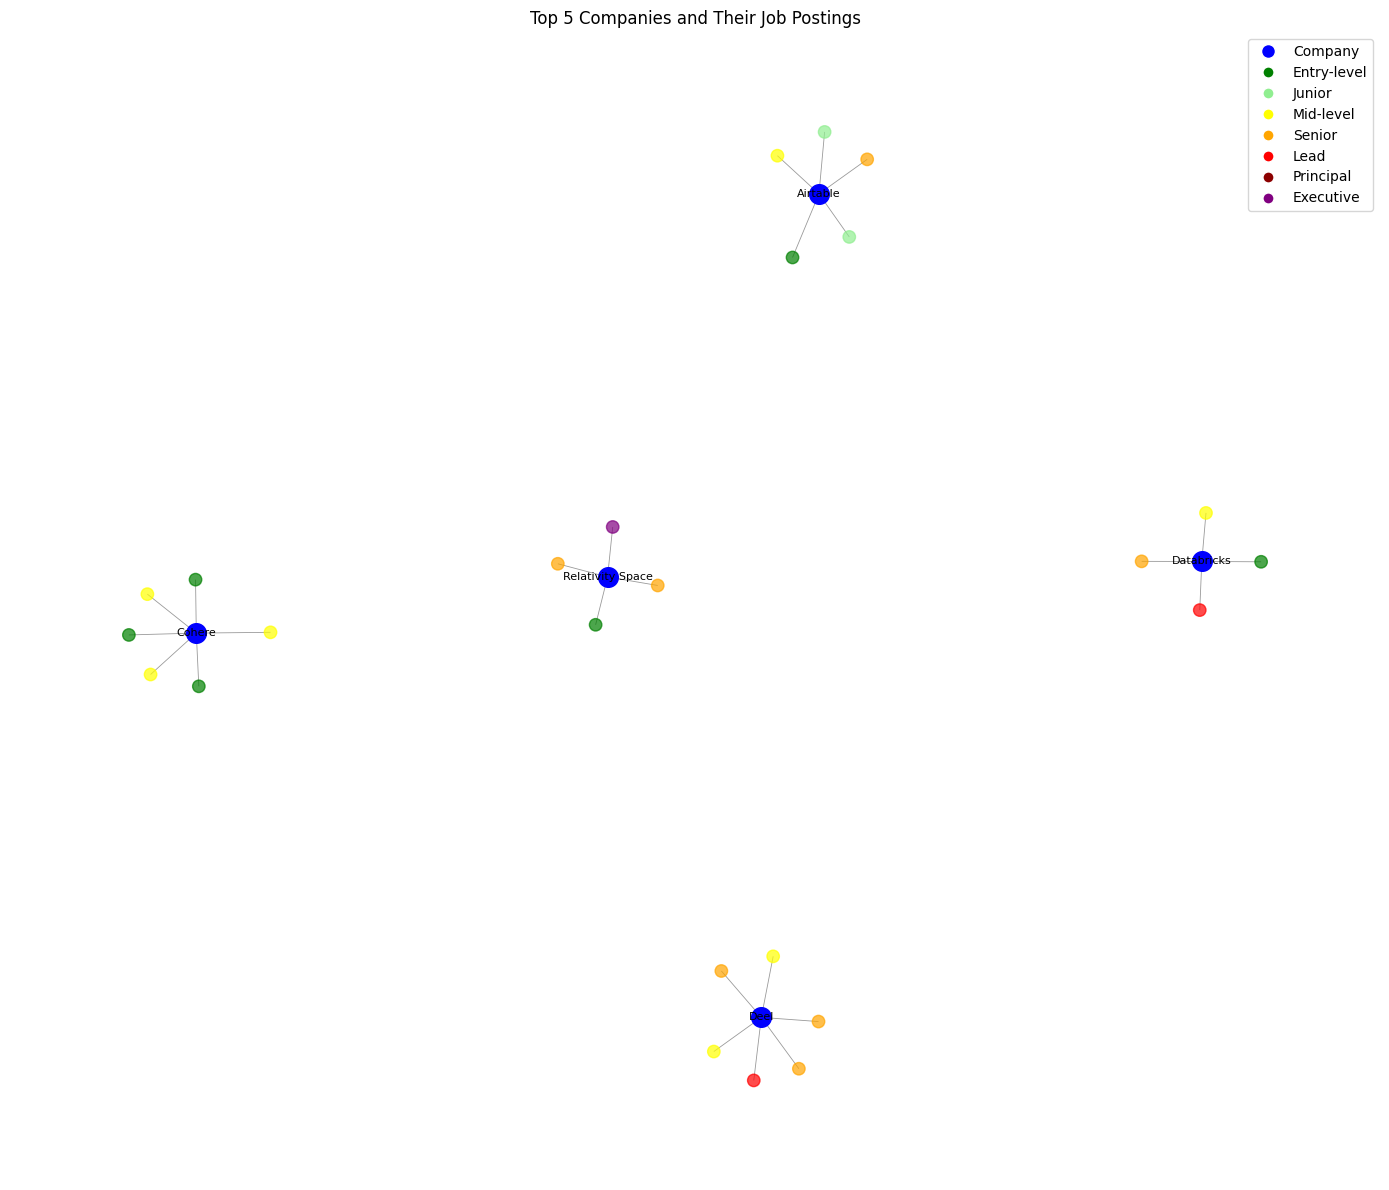

In [ ]:
# 7. Visualize Job Postings and Companies
# Select top companies by number of job postings
company_nodes = [node for node, attrs in G.nodes(data=True) if attrs.get('type') == 'company']
job_nodes = [node for node, attrs in G.nodes(data=True) if attrs.get('type') == 'job']

# Count job postings per company
company_job_count = {}
for job in job_nodes:
    company = G.nodes[job]['company']
    company_job_count[company] = company_job_count.get(company, 0) + 1

# Select top 5 companies by job count
top_companies = sorted(company_job_count.items(), key=lambda x: x[1], reverse=True)[:5]
top_company_nodes = [company for company, _ in top_companies]

# Get job nodes connected to these top companies
selected_job_nodes = []
for job in job_nodes:
    if G.nodes[job]['company'] in top_company_nodes:
        selected_job_nodes.append(job)
        # Limit to 5 jobs per company to avoid overcrowding
        if len(selected_job_nodes) >= len(top_company_nodes) * 5:
            break

# Create the visualization subgraph
viz_nodes = top_company_nodes + selected_job_nodes[:150]  # Limit to 150 jobs total
job_company_subgraph = G.subgraph(viz_nodes)

# Set up the plot
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(job_company_subgraph, seed=42)

# Draw companies (larger nodes)
nx.draw_networkx_nodes(job_company_subgraph, pos,
                      nodelist=top_company_nodes,
                      node_size=200,
                      node_color='blue',
                      label='Companies')

# Updated color map for job experience levels
job_color_map = {
    'Entry-level': 'green',
    'Junior': 'lightgreen',
    'Mid-level': 'yellow',
    'Senior': 'orange',
    'Lead': 'red',
    'Principal': 'darkred',
    'Executive': 'purple'
}

# Draw job postings with colors based on experience level
job_colors = []
job_nodes_in_subgraph = [n for n in selected_job_nodes if n in job_company_subgraph]

for node in job_nodes_in_subgraph:
    experience = G.nodes[node]['experience_level']
    job_colors.append(job_color_map.get(experience, 'gray'))

nx.draw_networkx_nodes(job_company_subgraph, pos,
                      nodelist=job_nodes_in_subgraph,
                      node_size=80,
                      node_color=job_colors,
                      alpha=0.7)

# Draw edges between jobs and companies
nx.draw_networkx_edges(job_company_subgraph, pos, width=0.6, alpha=0.4)

# Add labels to companies
company_labels = {node: G.nodes[node]['name'] for node in top_company_nodes}
nx.draw_networkx_labels(job_company_subgraph, pos, labels=company_labels, font_size=8)

# Add legend with correct experience levels
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Company')
]

# Add legend elements for job experience levels
for level, color in job_color_map.items():
    legend_elements.append(
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=level)
    )

plt.legend(handles=legend_elements, loc='upper right')

plt.title("Top 5 Companies and Their Job Postings")
plt.axis('off')
plt.tight_layout()
plt.show()

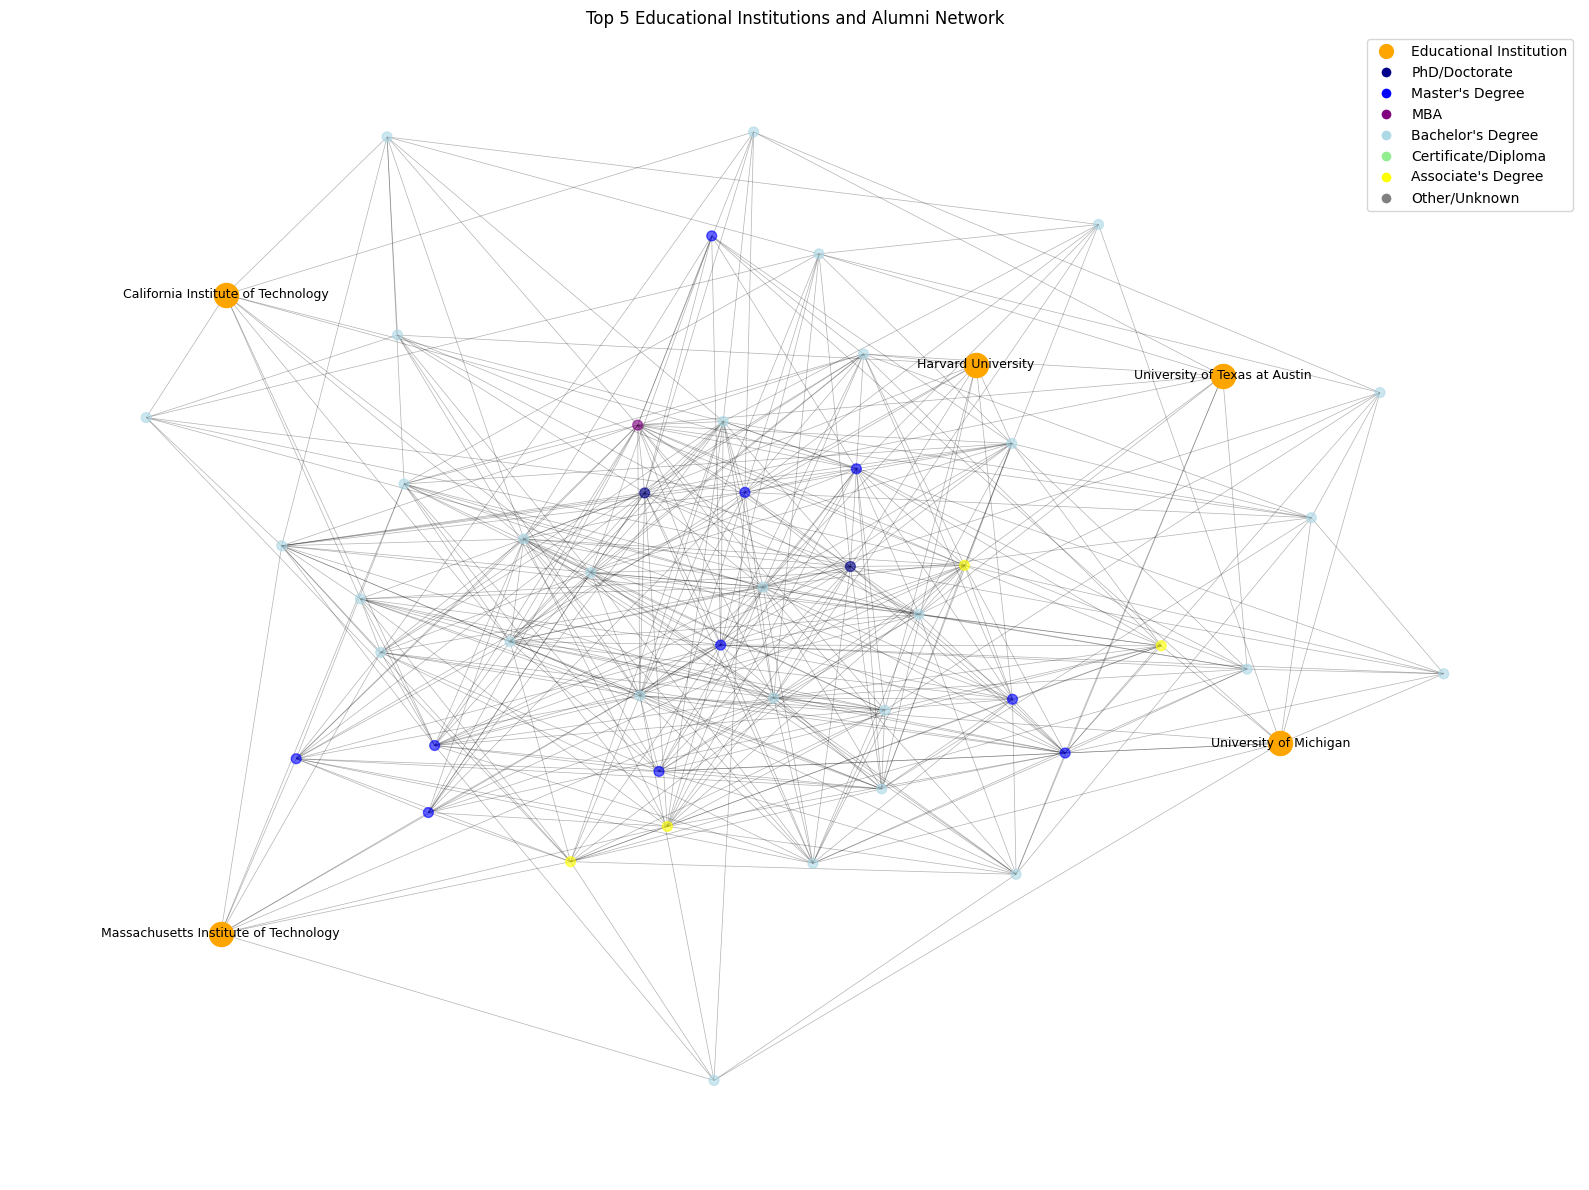

In [ ]:
# 8. Visualize Education Institutions and Profiles
# Create a smaller education network for visualization
institution_nodes = [node for node, attrs in G.nodes(data=True) if attrs.get('type') == 'institution']

# Count profiles connected to each institution
institution_profile_count = {}
for inst in institution_nodes:
    neighbors = list(G.neighbors(inst))
    profile_count = sum(1 for n in neighbors if G.nodes[n].get('type') == 'profile')
    institution_profile_count[inst] = profile_count

# Select top 20 institutions by profile count
top_institutions = sorted(institution_profile_count.items(), key=lambda x: x[1], reverse=True)[:5]
top_institution_nodes = [inst for inst, _ in top_institutions]

# For each institution, select a sample of profiles (max 10 per institution)
selected_profiles = set()
for inst in top_institution_nodes:
    profiles = [n for n in G.neighbors(inst) if G.nodes[n].get('type') == 'profile']
    selected_profiles.update(profiles[:10])  # Take up to 10 profiles per institution

# Create a subgraph for visualization
edu_viz_nodes = list(top_institution_nodes) + list(selected_profiles)
edu_subgraph = G.subgraph(edu_viz_nodes)

# Set up the plot
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(edu_subgraph, seed=42)

# Draw institutions (larger nodes)
nx.draw_networkx_nodes(edu_subgraph, pos,
                      nodelist=top_institution_nodes,
                      node_size=300,
                      node_color='orange',
                      label='Institutions')

# Function to categorize degrees
def categorize_degree(degree_str):
    degree_str = str(degree_str).lower()
    if any(phd in degree_str for phd in ['phd', 'doctor of philosophy', 'doctor of science', 'doctor of engineering', 'doctor of business', 'doctor of information']):
        return 'PhD'
    elif any(masters in degree_str for masters in ['master', 'm.s.', 'ms', 'm.eng', 'msc']):
        if 'business' in degree_str or 'mba' in degree_str:
            return 'MBA'
        return 'Masters'
    elif any(bachelors in degree_str for bachelors in ['bachelor', 'b.s.', 'bs', 'b.a.', 'ba', 'b.eng', 'bsc']):
        return 'Bachelors'
    elif any(cert in degree_str for cert in ['certificate', 'certification', 'diploma', 'nanodegree']):
        return 'Certificate'
    elif 'associate' in degree_str:
        return 'Associates'
    else:
        return 'Other'

# Color map for degree categories
degree_color_map = {
    'PhD': 'darkblue',
    'Masters': 'blue',
    'MBA': 'purple',
    'Bachelors': 'lightblue',
    'Certificate': 'lightgreen',
    'Associates': 'yellow',
    'Other': 'gray'
}

# Get degree information for profiles
profile_colors = []
profile_nodes_in_subgraph = [n for n in edu_subgraph.nodes() if G.nodes[n].get('type') == 'profile']

for profile in profile_nodes_in_subgraph:
    # Find education edges and the corresponding degree
    degree_category = 'Other'

    for inst in top_institution_nodes:
        if edu_subgraph.has_edge(profile, inst):
            edge_data = G.get_edge_data(profile, inst)
            if edge_data and 'degree' in edge_data:
                degree = edge_data.get('degree', '')
                new_category = categorize_degree(degree)
                # Take the "highest" degree if multiple exist
                if degree_category == 'Other' or (
                    (new_category == 'PhD') or
                    (new_category == 'Masters' and degree_category not in ['PhD']) or
                    (new_category == 'MBA' and degree_category not in ['PhD', 'Masters']) or
                    (new_category == 'Bachelors' and degree_category not in ['PhD', 'Masters', 'MBA']) or
                    (new_category == 'Certificate' and degree_category not in ['PhD', 'Masters', 'MBA', 'Bachelors']) or
                    (new_category == 'Associates' and degree_category not in ['PhD', 'Masters', 'MBA', 'Bachelors', 'Certificate'])
                ):
                    degree_category = new_category

    profile_colors.append(degree_color_map.get(degree_category, 'gray'))

# Draw profiles
nx.draw_networkx_nodes(edu_subgraph, pos,
                      nodelist=profile_nodes_in_subgraph,
                      node_size=50,
                      node_color=profile_colors,
                      alpha=0.6)

# Draw education edges
nx.draw_networkx_edges(edu_subgraph, pos, width=0.5, alpha=0.3)

# Add labels to institutions
institution_labels = {node: G.nodes[node]['name'] for node in top_institution_nodes}
nx.draw_networkx_labels(edu_subgraph, pos, labels=institution_labels, font_size=9)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=12, label='Educational Institution'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=degree_color_map['PhD'], markersize=8, label='PhD/Doctorate'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=degree_color_map['Masters'], markersize=8, label='Master\'s Degree'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=degree_color_map['MBA'], markersize=8, label='MBA'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=degree_color_map['Bachelors'], markersize=8, label='Bachelor\'s Degree'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=degree_color_map['Certificate'], markersize=8, label='Certificate/Diploma'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=degree_color_map['Associates'], markersize=8, label='Associate\'s Degree'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=degree_color_map['Other'], markersize=8, label='Other/Unknown')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.title("Top 5 Educational Institutions and Alumni Network")
plt.axis('off')
plt.tight_layout()
plt.show()


### Step 3: Persist the Graph in ArangoDB

This section demonstrates how to persist the LinkedIn graph data in ArangoDB, reconnect to the stored graph, and leverage ArangoDB's query language (AQL) to perform complex relationship-based queries across profiles, companies, and job postings that would be computationally expensive in NetworkX alone.

In [ ]:
# 1. Load the NetworkX Graph into ArangoDB
# Reference: https://github.com/arangodb/nx-arangodb?tab=readme-ov-file#can-i-create-an-arangodb-graph-from-an-existing-networkx-graph
G_adb = nxadb.Graph(
    name="Linkedin",
    db=db,
    incoming_graph_data=G,
    write_batch_size=50000
)

In [ ]:
# 2. Re-connect to the same Graph

G_adb = nxadb.Graph(name="Linkedin", db=db)

[18:08:54 +0000] [INFO]: Graph 'Linkedin' exists.
INFO:nx_arangodb:Graph 'Linkedin' exists.
[18:08:54 +0000] [INFO]: Default node type set to 'Linkedin_node'
INFO:nx_arangodb:Default node type set to 'Linkedin_node'


In [ ]:
# 3. Display graph summary (number of nodes and edges)

print(f"Graph persisted to ArangoDB with {G_adb.number_of_nodes()} nodes and {G_adb.number_of_edges()} edges")

Graph persisted to ArangoDB with 1485 nodes and 165781 edges


In [ ]:
# 4. Query the Graph

# Query 1: Find profiles with Senior experience level

result = G_adb.query("""
    FOR node IN Linkedin_node
        FILTER node.type == 'profile' AND node.experience_level == 'Senior'
        RETURN {
            name: node.full_name,
            headline: node.headline,
            location: node.location,
            skills: node.skills
        }
""")

print(list(result))
print('-'*10)

# Query 2: Find employment relationships between profiles and NVIDIA

result = G_adb.query("""
    FOR edge IN Linkedin_node_to_Linkedin_node
        FILTER edge.type == 'employment'
        LET profile = DOCUMENT(edge._from)
        LET company = DOCUMENT(edge._to)
        FILTER company.name == 'NVIDIA'
        RETURN {
            person: profile.full_name,
            position: edge.title,
            duration: {start: edge.start_date, end: edge.end_date},
            location: edge.city + ', ' + edge.country
        }
""")

print(list(result))
print('-'*10)

# Query 3: Find remote job postings with required skills in AWS

result = G_adb.query("""
    FOR node IN Linkedin_node
        FILTER node.type == 'job'
        FILTER node.remote_status == 'Remote'
        FILTER 'AWS' IN node.required_skills
        RETURN {
            title: node.job_title,
            company: node.company,
            location: node.location,
            experience_level: node.experience_level,
            posting_date: node.posting_date,
            required_skills: node.required_skills
        }
""")

print(list(result))

[{'name': 'Patricia Miller', 'headline': 'Cybersecurity Specialist at Cisco', 'location': 'Munich, Germany', 'skills': ['Three.js', ' High-Performance Computing', ' Xamarin', ' Vue.js', ' Web3', ' Diffusion Models']}, {'name': 'Anthony Gonzalez', 'headline': 'Lead Data Scientist at Lenovo', 'location': 'Santa Monica, United States', 'skills': ['Luigi', ' Databricks', ' RAG', ' Groovy', ' PostgreSQL', ' Microsoft Teams', ' Bitbucket']}, {'name': 'Lisa Smith', 'headline': 'Senior Product Manager at Intel', 'location': 'Los Angeles, United States', 'skills': ['Three.js', ' D3.js', ' Next.js', ' IntelliJ', ' Reactive Programming']}, {'name': 'Amanda Dudley', 'headline': 'Cybersecurity Specialist at Retool', 'location': 'Oslo, Norway', 'skills': ['Microservices Architecture', ' DDD', ' Microsoft Teams', ' IntelliJ', ' Cassandra', ' ASP.NET']}, {'name': 'Nicholas Arnold', 'headline': 'Compliance Specialist at Baidu', 'location': 'Taipei, Taiwan', 'skills': ['MATLAB', ' High-Performance Compu

### Step 4: Build the Agentic App with LangChain & LangGraph

This section demonstrates how to build an intelligent agentic application that leverages LangChain tools and LangGraph to dynamically orchestrate between AQL traversals, NetworkX algorithms, and visualization capabilities, enabling natural language interactions with the LinkedIn graph while automatically selecting the optimal query execution path and generating appropriate visualizations to enhance understanding of the results.

In [ ]:
# 0. Define the dynamic schema for ArangoDB Graph representation of LinkedIn data
dynamic_schema = {
  "Graph Schema": [
    {
      "graph_name": "Linkedin",
      "edge_definitions": [
        {
          "edge_collection": "Linkedin_node_to_Linkedin_node",
          "from_vertex_collections": ["Linkedin_node"],
          "to_vertex_collections": ["Linkedin_node"]
        }
      ]
    }
  ],
  "Collection Schema": [
    {
      "collection_name": "Linkedin_node",
      "collection_type": "document",
      "node_types": {
        "profile": {
          "properties": [
            {"name": "_key", "type": "str"},
            {"name": "_id", "type": "str"},
            {"name": "_rev", "type": "str"},
            {"name": "first_name", "type": "str"},
            {"name": "last_name", "type": "str"},
            {"name": "full_name", "type": "str"},
            {"name": "linkedin_url", "type": "str"},
            {"name": "headline", "type": "str"},
            {"name": "city", "type": "str"},
            {"name": "country", "type": "str"},
            {"name": "location", "type": "str"},
            {"name": "skills", "type": "list"},
            {"name": "summary", "type": "str"},
            {"name": "experience_level", "type": "str"},
            {"name": "type", "type": "str"}
          ],
          "example": {
            "_key": "0",
            "_id": "Linkedin_node/0",
            "_rev": "_jTcy5F----",
            "first_name": "Danielle",
            "last_name": "Johnson",
            "full_name": "Danielle Johnson",
            "linkedin_url": "https://linkedin.com/in/danielle-johnson",
            "headline": "Director of Product at IBM",
            "city": "Santa Monica",
            "country": "United States",
            "location": "Santa Monica, United States",
            "skills": ["Vue.js", "HTML5", "VS Code", "BDD"],
            "summary": "Executive technology professional with extensive experience in BDD, Vue.js, HTML5. 23+ years of leadership in the tech industry, focused on organizational growth and excellence.",
            "experience_level": "Leadership",
            "type": "profile"
          }
        },
        "company": {
          "properties": [
            {"name": "_key", "type": "str"},
            {"name": "_id", "type": "str"},
            {"name": "_rev", "type": "str"},
            {"name": "name", "type": "str"},
            {"name": "type", "type": "str"}
          ],
          "example": {
            "_key": "1000",
            "_id": "Linkedin_node/1000",
            "_rev": "_jTcy5Fm--A",
            "name": "IBM",
            "type": "company"
          }
        },
        "institution": {
          "properties": [
            {"name": "_key", "type": "str"},
            {"name": "_id", "type": "str"},
            {"name": "_rev", "type": "str"},
            {"name": "name", "type": "str"},
            {"name": "type", "type": "str"}
          ],
          "example": {
            "_key": "1170",
            "_id": "Linkedin_node/1170",
            "_rev": "_jTd3mBm--U",
            "name": "University of Cape Town",
            "type": "institution"
          }
        },
        "job": {
          "properties": [
            {"name": "_key", "type": "str"},
            {"name": "_id", "type": "str"},
            {"name": "_rev", "type": "str"},
            {"name": "job_title", "type": "str"},
            {"name": "company", "type": "str"},
            {"name": "city", "type": "str"},
            {"name": "country", "type": "str"},
            {"name": "location", "type": "str"},
            {"name": "description", "type": "str"},
            {"name": "required_skills", "type": "list"},
            {"name": "posting_date", "type": "str"},
            {"name": "job_type", "type": "str"},
            {"name": "remote_status", "type": "str"},
            {"name": "industry", "type": "str"},
            {"name": "experience_level", "type": "str"},
            {"name": "type", "type": "str"}
          ],
          "example": {
            "_key": "1440",
            "_id": "Linkedin_node/1440",
            "_rev": "_jTcy5F6--D",
            "job_title": "Penetration Tester",
            "company": "Cohere",
            "city": "Mountain View",
            "country": "United States",
            "location": "Mountain View, United States",
            "description": "Cohere is at the forefront of artificial intelligence research and development...",
            "required_skills": ["AWS", "CloudFormation", "IoT", "Game Development", "Security", "Penetration Testing", "Risk Analysis", "Incident Response"],
            "posting_date": "2025-01-25",
            "job_type": "Full-time",
            "remote_status": "Remote",
            "industry": "Tech",
            "experience_level": "Senior",
            "type": "job"
          }
        }
      }
    },
    {
      "collection_name": "Linkedin_node_to_Linkedin_node",
      "collection_type": "edge",
      "edge_types": {
        "connection": {
          "properties": [
            {"name": "_key", "type": "str"},
            {"name": "_id", "type": "str"},
            {"name": "_from", "type": "str"},
            {"name": "_to", "type": "str"},
            {"name": "_rev", "type": "str"},
            {"name": "mutual_connections_count", "type": "int"},
            {"name": "type", "type": "str"}
          ],
          "example": {
            "_key": "0",
            "_id": "Linkedin_node_to_Linkedin_node/0",
            "_from": "Linkedin_node/0",
            "_to": "Linkedin_node/697",
            "_rev": "_jTd3nDe---",
            "mutual_connections_count": 4,
            "type": "connection"
          }
        },
        "employment": {
          "properties": [
            {"name": "_key", "type": "str"},
            {"name": "_id", "type": "str"},
            {"name": "_from", "type": "str"},
            {"name": "_to", "type": "str"},
            {"name": "_rev", "type": "str"},
            {"name": "title", "type": "str"},
            {"name": "start_date", "type": "str"},
            {"name": "end_date", "type": "str"},
            {"name": "city", "type": "str"},
            {"name": "country", "type": "str"},
            {"name": "description", "type": "str"},
            {"name": "employment_type", "type": "str"},
            {"name": "type", "type": "str"}
          ],
          "example": {
            "_key": "110868",
            "_id": "Linkedin_node_to_Linkedin_node/110868",
            "_from": "Linkedin_node/438",
            "_to": "Linkedin_node/1000",
            "_rev": "_jTd3rIq--f",
            "title": "Software Engineering Intern",
            "start_date": "2022-07-09",
            "end_date": "2025-02-23",
            "city": "Sydney",
            "country": "Australia",
            "description": "- Successfully delivered critical initiatives ahead of schedule\n- Implemented optimizations that reduced latency by 43%\n- Developed a high-performance application using GitLab, Bootstrap\n- Designed and built automation systems that improved team productivity",
            "employment_type": "Internship",
            "type": "employment"
          }
        },
        "education": {
          "properties": [
            {"name": "_key", "type": "str"},
            {"name": "_id", "type": "str"},
            {"name": "_from", "type": "str"},
            {"name": "_to", "type": "str"},
            {"name": "_rev", "type": "str"},
            {"name": "degree", "type": "str"},
            {"name": "field_of_study", "type": "str"},
            {"name": "start_year", "type": "int"},
            {"name": "end_year", "type": "int"},
            {"name": "years", "type": "str"},
            {"name": "type", "type": "str"}
          ],
          "example": {
            "_key": "107481",
            "_id": "Linkedin_node_to_Linkedin_node/107481",
            "_from": "Linkedin_node/421",
            "_to": "Linkedin_node/1170",
            "_rev": "_jTd3qo6--m",
            "degree": "Bachelor of Arts",
            "field_of_study": "Data Science",
            "start_year": 2013,
            "end_year": 2017,
            "years": "2013-2017",
            "type": "education"
          }
        },
        "job_posting": {
          "properties": [
            {"name": "_key", "type": "str"},
            {"name": "_id", "type": "str"},
            {"name": "_from", "type": "str"},
            {"name": "_to", "type": "str"},
            {"name": "_rev", "type": "str"},
            {"name": "type", "type": "str"}
          ],
          "example": {
            "_key": "165736",
            "_id": "Linkedin_node_to_Linkedin_node/165736",
            "_from": "Linkedin_node/1090",
            "_to": "Linkedin_node/1440",
            "_rev": "_jTd3s42--G",
            "type": "job_posting"
          }
        }
      }
    }
  ]
}


In [ ]:
# 1. Create the ArangoGraph LangChain wrapper
# Reference: https://api.python.langchain.com/en/latest/graphs/langchain_community.graphs.arangodb_graph.ArangoGraph.html

arango_graph = ArangoGraph(db)

In [ ]:
# 2. Define the llm object
# Note: You can use any llm you want. We will be using OpenAI for example purposes.

import os

os.environ["OPENAI_API_KEY"] = "sk-..."

llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

In [ ]:
# 3. Define the Text to AQL Tool (Simple Query)
@tool
def text_to_aql_to_text(query: str):
    """Executes AQL queries on the ArangoDB Graph based on natural language queries.
    This tool converts natural language into AQL queries, executes them, and translates
    results back to natural language. Use for simple traversals, filtering, and basic
    graph operations.

    Args:
        query (str): Natural language query about the graph

    Returns:
        str: Natural language explanation of the query results
    """

    # Initialize the language model for query processing
    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    # Create a query chain for executing AQL queries with ArangoDB
    chain = ArangoGraphQAChain.from_llm(
        llm=llm,
        graph=arango_graph,  # Connects to the ArangoDB graph
        verbose=True,  # Enables logging for debugging purposes
        allow_dangerous_requests=True,  # Allows complex queries (use with caution)
    )

    # Enhance the query by including schema information for context
    enhanced_query = f"""
    Query: {query}

    Graph Schema: {dynamic_schema}  # Provides schema context to improve query accuracy
    """

    # Execute the AQL query using the chain
    result = chain.invoke(enhanced_query)

    # Post-process the raw AQL results into a more natural and concise response
    concise_result = llm.invoke(f"""
        Based on the following query: {query}

        And the following detailed result: {result["result"]}

        Generate a short and concise response that directly answers the query.

        Your response:
    """).content

    return concise_result

In [ ]:
# 4. Define the Text to NetworkX/cuGraph Tool (Complex Query)
@tool
def text_to_nx_algorithm_to_text(query: str):
    """Executes NetworkX algorithms on the ArangoDB Graph based on natural language queries.

    This tool converts natural language into NetworkX code, executes it, and translates
    results back to natural language. Use only for complex graph algorithms that cannot
    be expressed in AQL.

    Args:
        query (str): Natural language query about graph algorithms

    Returns:
        str: Natural language explanation of the algorithm results
    """
    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    # Step 1: Generate NetworkX code from natural language query
    print("1) Generating NetworkX code")
    text_to_nx = llm.invoke(f"""
    I have a NetworkX Graph called `G_adb`. It has the following schema: {dynamic_schema}

    I have the following graph analysis query: {query}.

    Generate the Python Code required to answer the query using the `G_adb` object.

    Be very precise on the NetworkX algorithm you select to answer this query. Think step by step.

    Only assume that networkx is installed, and other base python dependencies.

    Always set the last variable as `FINAL_RESULT`, which represents the answer to the original query.

    Only provide python code that I can directly execute via `exec()`. Do not provide any instructions.

    Make sure that `FINAL_RESULT` stores a short & concise answer. Avoid setting this variable to a long sequence.

    CRITICAL: Your code must preserve human-readable attributes from the graph schema: {dynamic_schema}
        When analyzing nodes, always capture relevant attributes (name, title, etc.) alongside algorithmic metrics.
        In your FINAL_RESULT, include both the metrics AND the human-readable attributes for each node.
        Do NOT return raw node IDs like 'Linkedin_node/881' without their corresponding attributes.

    Important limitations:
    - DO NOT use subgraph operations on G_adb as they're not supported

    Your code:
    """).content

    # Clean up the generated code by removing markdown code fences if present
    text_to_nx_cleaned = re.sub(r"^```python\n|```$", "", text_to_nx, flags=re.MULTILINE).strip()

    # Print the generated code for debugging
    print('-'*10)
    print(text_to_nx_cleaned)
    print('-'*10)

    # Step 2: Execute the NetworkX code with retry logic
    print("\n2) Executing NetworkX code")
    global_vars = {"G_adb": G_adb, "nx": nx}  # Set up global variables for execution context
    local_vars = {}  # Local variables to capture execution results

    attempt = 1
    MAX_ATTEMPTS = 3  # Maximum number of retry attempts
    text_to_nx_final = text_to_nx  # Store the original code for the final response

    while attempt <= MAX_ATTEMPTS:
        try:
            # Execute the generated code
            exec(text_to_nx_cleaned, global_vars, local_vars)
            # If execution successful, break the loop
            break
        except Exception as e:
            # Handle execution errors
            error_msg = f"EXEC ERROR (Attempt {attempt}/{MAX_ATTEMPTS}): {e}"
            print(error_msg)

            if attempt == MAX_ATTEMPTS:
                # If we've reached max attempts, return error message
                return f"Failed to execute NetworkX code after {MAX_ATTEMPTS} attempts: {str(e)}"

            # Try to fix the code using LLM
            fix_prompt = f"""
            The following NetworkX code has an error: {str(e)}

            ```
            {text_to_nx_cleaned}
            ```

            Be very precise on the NetworkX algorithm you select to answer this query. Think step by step.

            Only assume that networkx is installed, and other base python dependencies.

            Always set the last variable as `FINAL_RESULT`, which represents the answer to the original query.

            Only provide python code that I can directly execute via `exec()`. Do not provide any instructions.

            Make sure that `FINAL_RESULT` stores a short & concise answer. Avoid setting this variable to a long sequence.

            CRITICAL: Your code must preserve human-readable attributes from the graph schema: {dynamic_schema}
        When analyzing nodes, always capture relevant attributes (name, title, etc.) alongside algorithmic metrics.
        In your FINAL_RESULT, include both the metrics AND the human-readable attributes for each node.
        Do NOT return raw node IDs like 'Linkedin_node/881' without their corresponding attributes.

            Important limitations:
            - DO NOT use subgraph operations on G_adb as they're not supported

            Your code:
            """

            # Get corrected code from LLM
            corrected_code = llm.invoke(fix_prompt).content
            text_to_nx_cleaned = re.sub(r"^```python\n|```$", "", corrected_code, flags=re.MULTILINE).strip()
            text_to_nx_final = corrected_code

            # Print the corrected code for debugging
            print(f"Corrected code (Attempt {attempt}):")
            print('-'*10)
            print(text_to_nx_cleaned)
            print('-'*10)

            attempt += 1

    # Verify that FINAL_RESULT was defined in the code execution
    if "FINAL_RESULT" not in local_vars:
        return "Error: Code execution completed but FINAL_RESULT variable was not defined."

    # Extract the result from the execution context
    FINAL_RESULT = local_vars["FINAL_RESULT"]
    print('-'*10)
    print(f"FINAL_RESULT: {FINAL_RESULT}")
    print('-'*10)

    # Step 3: Translate the technical results back to natural language
    print("3) Formulating final answer")
    nx_to_text = llm.invoke(f"""
        I have a NetworkX Graph called `G_adb`. It has the following schema: {arango_graph.schema}

        I have the following graph analysis query: {query}.

        I have executed the following python code to help me answer my query:

        ---
        {text_to_nx_final}
        ---

        The `FINAL_RESULT` variable is set to the following: {FINAL_RESULT}.

        Based on my original Query and FINAL_RESULT, generate a short and concise response to
        answer my query.

        Your response:
    """).content

    return nx_to_text


In [ ]:
# 5. Define the Hybrid Query Agent
@tool
def hybrid_query_execution(query: str):
    """Executes hybrid queries combining ArangoDB AQL and NetworkX algorithms.

    This tool intelligently chooses between AQL (for simple traversals and filters)
    and NetworkX/cuGraph (for complex graph algorithms), or combines both for
    contextually rich responses.

    Args:
        query (str): Natural language query about the graph

    Returns:
        str: Natural language explanation of the results
    """
    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    # Step 1: Analyze the query to determine the appropriate execution strategy
    print("1) Analyzing query and determining execution strategy")
    query_analysis = llm.invoke(f"""
    I need to determine the best execution strategy for this graph query: "{query}"

    Graph Schema: {dynamic_schema}

    Choose the best execution strategy:
    1. SIMPLE: Use AQL for basic traversals, filtering, aggregation (via text_to_aql_to_text)
    2. COMPLEX: Use NetworkX algorithms for complex analytics (via text_to_nx_algorithm_to_text)
    3. HYBRID: Combine AQL and NetworkX where AQL retrieves specific data and NetworkX performs analytics on it

    For your answer, provide:
    - STRATEGY: [SIMPLE, COMPLEX, or HYBRID]
    - REASONING: Brief explanation of why this strategy is appropriate
    - EXECUTION_PLAN: For HYBRID queries, describe what AQL should retrieve and what NetworkX should analyze

    Your analysis:
    """).content

    print(f"Query Analysis:\n{query_analysis}")

    # Step 2: Route the query to the appropriate execution method based on analysis
    if "STRATEGY: SIMPLE" in query_analysis:
        # For simple queries that can be handled with AQL alone
        print("\n2) Executing SIMPLE query via AQL")
        return text_to_aql_to_text(query)

    elif "STRATEGY: COMPLEX" in query_analysis:
        # For complex queries requiring NetworkX graph algorithms
        print("\n2) Executing COMPLEX query via NetworkX")
        # Enhance the query to ensure human-readable results
        enhanced_query = f"""
        {query}

        IMPORTANT: In your response, do NOT return raw node IDs (like 'Linkedin_node/881').
        Instead, access and return meaningful attributes for each node based on the schema: {dynamic_schema}

        For person nodes, include attributes like name, title, company, etc. when available.
        For other node types, include the most relevant identifying information.

        Always map node IDs to their human-readable attributes in your final results.
        """
        return text_to_nx_algorithm_to_text(enhanced_query)

    else:  # HYBRID strategy
        # For queries requiring both AQL for data retrieval and NetworkX for analytics
        print("\n2) Executing HYBRID query (AQL + NetworkX)")

        # Extract the execution plan from the analysis
        execution_plan = query_analysis.split("EXECUTION_PLAN:")[1].strip() if "EXECUTION_PLAN:" in query_analysis else ""

        # Step 2a: Generate an AQL query to retrieve the necessary data
        aql_query = llm.invoke(f"""
        I need to execute the first part of this hybrid query: "{query}"

        Based on this execution plan: {execution_plan}

        Generate a natural language query for the AQL component that will retrieve the necessary data.
        The AQL should return CONCRETE DATA that can be directly used by NetworkX, not just references or IDs.

        IMPORTANT: Make sure to retrieve ALL relevant attributes for each node based on the schema: {dynamic_schema}
        This includes names, titles, companies, and any other identifying information that would make results human-readable.

        AQL query:
        """).content

        print(f"AQL component: {aql_query}")
        # Execute the AQL query and get results
        aql_results = text_to_aql_to_text(aql_query)
        print(f"AQL results: {aql_results}")

        # Step 2b: Generate a NetworkX algorithm to analyze the data retrieved by AQL
        nx_query = llm.invoke(f"""
        I need to execute the second part of this hybrid query: "{query}"

        Based on this execution plan: {execution_plan}
        And these AQL results: {aql_results}

        Important: Do NOT use subgraph operations on G_adb as they are not supported.
        Instead, generate code that either:
        1. Creates a NEW native NetworkX graph from scratch using the AQL results, or
        2. Works directly with the full G_adb graph but filters operations to only consider relevant nodes/edges

        Generate a natural language query for the NetworkX component that will analyze the data
        retrieved by AQL, respecting the limitations above.

        NetworkX query:
        """).content

        print(f"NetworkX component: {nx_query}")
        # Execute the NetworkX analysis
        nx_results = text_to_nx_algorithm_to_text(nx_query)
        print(f"NetworkX results: {nx_results}")

        # Step 3: Combine results from both approaches into a cohesive response
        final_response = llm.invoke(f"""
        Original query: "{query}"

        AQL results: {aql_results}

        NetworkX analysis: {nx_results}

        Please synthesize a concise, natural language response that integrates both the AQL results and the NetworkX analysis
        to fully answer the original query.

        IMPORTANT REQUIREMENT: Do NOT refer to nodes by their IDs (like 'Linkedin_node/881').
        Always use human-readable attributes like names, titles, and other identifying information available in the results.

        Your response should be comprehensive but easy to understand for non-technical users.

        Your response:
        """).content

        return final_response


In [ ]:
# 6. Define the Visualization Agent
@tool
def visualize_graph_data(query: str):
    """Creates visualizations of graph data based on explicit visualization requests.

    This tool generates appropriate visualizations (network graphs, bar charts, etc.)
    for the graph data based on the user's query. Only use this when the user
    specifically asks for visualization.

    Args:
        query (str): Query about what to visualize (e.g., "Visualize connections between...")

    Returns:
        str: Visualization code, image, and explanation
    """
    # Import necessary libraries for data manipulation and visualization
    import networkx as nx
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from IPython.display import display, Image
    from google.colab import files
    import io
    import base64

    # Handle optional Plotly dependency for more interactive visualizations
    try:
        import plotly.express as px
        import plotly.graph_objects as go
        plotly_available = True
    except ImportError:
        plotly_available = False
        print("Plotly libraries not available, will use matplotlib instead")

    # Step 1: Plan what data needs to be extracted for the requested visualization
    print("1) Planning data extraction for visualization")
    data_plan = llm.invoke(f"""
    I need to extract data from a graph to create a visualization based on this request:
    "{query}"

    Graph Schema: {dynamic_schema}

    First, determine:
    1. What exact data needs to be extracted from the graph
    2. How to extract this data using AQL-like queries or direct node/edge access

    CRITICAL: Your plan must ensure we preserve human-readable attributes from the graph schema
    like names, titles, companies, etc. Do NOT use raw node IDs without their corresponding attributes.

    Your data extraction plan:
    """).content

    print(f"Data extraction plan: {data_plan}")

    # Step 2: Generate Python code to extract data and create the visualization
    print("2) Generating visualization code")
    viz_code = llm.invoke(f"""
    I have a NetworkX Graph called `G_adb`. It has the following schema: {dynamic_schema}

    I need to visualize this data based on this request: {query}.

    Based on this data extraction plan: {data_plan}

    Generate the Python Code required to:
    1. Extract the relevant data from `G_adb` based on the visualization request
    2. Create an appropriate visualization (network graph, bar chart, etc.)
    3. Save the visualization to a file
    4. Also generate a base64 encoded version for display in Google Colab

    Be very precise in your approach. Think step by step.

    Only assume that networkx, matplotlib, numpy, pandas, io, and base64 are installed.

    CRITICAL: Your plan must ensure we preserve human-readable attributes from the graph schema
    like names, titles, companies, etc. Do NOT use raw node IDs without their corresponding attributes.

    Important limitations:
    - DO NOT use subgraph operations on G_adb as they're not supported
    - Instead, extract nodes/edges and create a new graph if needed
    - For network graphs, create a NEW NetworkX graph with the extracted data
    - Make sure to extract human-readable attributes (names, titles, etc.)
    - Set figure size to at least (10, 8) for readability

    At the end of your code, add these lines to create a base64 version for display:
    ```
    # Save to file
    plt.savefig(VIZ_FILENAME, bbox_inches='tight')

    # Also create base64 version for Colab display
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    B64_IMG = f"data:image/png;base64,{{img_str}}"
    ```

    Set these variables at the end:
    1. `VIZ_FILENAME` - path to the saved visualization file
    2. `B64_IMG` - base64 string of the image for Colab display

    Only provide python code that I can directly execute via `exec()`. Do not provide any instructions.

    Your code:
    """).content

    # Clean up the generated code by removing markdown code fences if present
    viz_code_cleaned = re.sub(r"^```python\n|```$", "", viz_code, flags=re.MULTILINE).strip()

    # Print the generated code for debugging
    print('-'*10)
    print(viz_code_cleaned)
    print('-'*10)

    # Step 3: Execute the visualization code with retry logic
    print("\n3) Executing visualization code")
    # Set up global variables for execution context
    global_vars = {
        "G_adb": G_adb,
        "nx": nx,
        "plt": plt,
        "np": np,
        "pd": pd,
        "io": io,
        "base64": base64,
        "px": px if plotly_available else None,
        "go": go if plotly_available else None
    }

    local_vars = {}  # Local variables to capture execution results

    attempt = 1
    MAX_ATTEMPTS = 3  # Maximum number of retry attempts
    viz_code_final = viz_code  # Store the original code for reference

    # Try executing the code with retry mechanism for errors
    while attempt <= MAX_ATTEMPTS:
        try:
            # Execute the generated visualization code
            exec(viz_code_cleaned, global_vars, local_vars)
            # If execution successful, break the loop
            break
        except Exception as e:
            # Handle execution errors
            error_msg = f"EXEC ERROR (Attempt {attempt}/{MAX_ATTEMPTS}): {e}"
            print(error_msg)

            if attempt == MAX_ATTEMPTS:
                # If we've reached max attempts, return error message
                return f"Failed to create visualization after {MAX_ATTEMPTS} attempts: {str(e)}"

            # Try to fix the code using LLM
            fix_prompt = f"""
            The following visualization code has an error: {str(e)}

            ```
            {viz_code_cleaned}
            ```

            Fix the error and provide corrected code.

            Important limitations:
            - DO NOT use subgraph operations on G_adb as they're not supported
            - Instead, extract nodes/edges and create a new graph if needed
            - For network graphs, create a NEW NetworkX graph with the extracted data
            - Make sure to extract human-readable attributes (names, titles, etc.)

            CRITICAL: Your code must preserve human-readable attributes from the graph schema: {dynamic_schema}
            When analyzing nodes, always capture relevant attributes (name, title, etc.) alongside algorithmic metrics.
            In your visualization, include human-readable attributes for labels and tooltips.
            Do NOT display raw node IDs like 'Linkedin_node/881' without their corresponding attributes.

            Make sure to include these lines at the end to create a base64 version for display:
            ```
            # Save to file
            plt.savefig(VIZ_FILENAME, bbox_inches='tight')

            # Also create base64 version for Colab display
            buf = io.BytesIO()
            plt.savefig(buf, format='png')
            buf.seek(0)
            img_str = base64.b64encode(buf.read()).decode('utf-8')
            B64_IMG = f"data:image/png;base64,{{img_str}}"
            ```

            Set both these variables:
            1. VIZ_FILENAME - path to the file
            2. B64_IMG - base64 string for display

            Only provide python code that I can directly execute via `exec()`. Do not provide any instructions.

            Your code:
            """

            # Get corrected code from LLM
            corrected_code = llm.invoke(fix_prompt).content
            viz_code_cleaned = re.sub(r"^```python\n|```$", "", corrected_code, flags=re.MULTILINE).strip()
            viz_code_final = corrected_code

            # Print the corrected code for debugging
            print(f"Corrected code (Attempt {attempt}):")
            print('-'*10)
            print(viz_code_cleaned)
            print('-'*10)

            attempt += 1

    # Verify that required variables were defined in the code execution
    if "VIZ_FILENAME" not in local_vars:
        return "Error: Visualization code executed but VIZ_FILENAME variable was not defined."

    if "B64_IMG" not in local_vars:
        return "Error: Visualization code executed but B64_IMG variable was not defined."

    # Get the path to the generated visualization file
    VIZ_FILENAME = local_vars["VIZ_FILENAME"]
    B64_IMG = local_vars["B64_IMG"]
    print('-'*10)
    print(f"VIZ_FILENAME: {VIZ_FILENAME}")
    print(f"Base64 image available for display")
    print('-'*10)

    # Display the image directly in the notebook
    # display(Image(VIZ_FILENAME))

    # Return markdown with embedded base64 image
    img_markdown = f"""
## Visualization

<img src="{B64_IMG}" alt="Graph Visualization" style="max-width: 100%;"> """

    return img_markdown


In [ ]:
# 7. Define the Outreach Message Agent
@tool
def linkedin_outreach_message(query: str):
    """Generates personalized LinkedIn outreach messages based on profile data.
    This tool uses AQL to retrieve a person's LinkedIn profile details and then
    crafts a personalized outreach message appropriate for LinkedIn's character limits.

    Args:
        query (str): Query containing the person's name and/or any specific outreach context

    Returns:
        str: Personalized LinkedIn outreach message with character count
    """
    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    # Step 1: Extract the target person's name and outreach context from the user's query
    print("1) Extracting target information from query")
    target_info = llm.invoke(f"""
    From this outreach request: "{query}"

    Extract the following information:
    1. Full name of the target person (or partial name if that's all that's provided)
    2. Any specific context or purpose for the outreach

    Format your response as:
    TARGET_NAME: [name]
    OUTREACH_CONTEXT: [brief description of outreach purpose]
    """).content

    # Parse the target name from the LLM response using regex
    target_name_match = re.search(r"TARGET_NAME:\s*(.*?)(?:\n|$)", target_info)
    target_name = target_name_match.group(1).strip() if target_name_match else ""

    # Parse the outreach context from the LLM response using regex
    outreach_context_match = re.search(r"OUTREACH_CONTEXT:\s*(.*?)(?:\n|$)", target_info, re.DOTALL)
    outreach_context = outreach_context_match.group(1).strip() if outreach_context_match else ""

    print(f"Target name: {target_name}")
    print(f"Outreach context: {outreach_context}")

    # Validate that a target name was successfully extracted
    if not target_name:
        return "Error: Could not identify a target person's name from your request. Please provide a name for the LinkedIn outreach."

    # Step 2: Query the LinkedIn profile data of the target person using AQL
    profile_query = f"Find the LinkedIn profile of {target_name} and retrieve all relevant details about their experience, skills, and background"

    print("2) Retrieving profile data via AQL")
    profile_data = text_to_aql_to_text(profile_query)  # Call the AQL tool to get profile information
    print(f"Profile data retrieved: {profile_data}")

    # Step 3: Generate a personalized outreach message based on the profile data
    print("3) Generating personalized outreach message")
    message = llm.invoke(f"""
    You need to write a personalized LinkedIn connection request message to {target_name} based on their profile:

    {profile_data}

    Outreach context/purpose: {outreach_context}

    Important LinkedIn message guidelines:
    1. Connection request messages have a 300 character limit
    2. Be professional, concise, and authentic
    3. Reference specific details from their profile to show you've done your research
    4. Include a clear purpose for connecting
    5. End with a soft call-to-action

    Write a message that stays within the 300 character limit. Count the characters carefully.
    Include the character count at the end of your response.
    """).content

    # Step 4: Format the final output with the message and additional context
    print("4) Formatting final output")
    final_output = llm.invoke(f"""
    Based on the LinkedIn outreach message you created:

    {message}

    Format a clean final output with:
    1. A brief intro about who you're messaging
    2. The actual message text formatted for copying
    3. The character count
    4. 1-2 bullet points on why this approach is effective

    Make sure to verify the character count is under 300 characters.
    """).content

    return final_output

In [ ]:
# 8. Define the Job Matching Agent
@tool
def job_matching(query: str):
    """
    Matches users with relevant job opportunities based on their skills, interests,
    and experience level.

    This tool:
    - Extracts job search parameters from the user's query.
    - Executes a hybrid query (AQL + NetworkX) to find the best job matches.
    - Analyzes skill gaps and provides actionable job recommendations.

    Args:
        query (str): Natural language query about job interests or skill-based job matching.

    Returns:
        str: A structured job recommendation report, including matching jobs, skill analysis,
             and next steps for improvement.
    """

    # Initialize the language model for query processing and analysis
    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    # Step 1: Parse the user's query to extract relevant job search parameters
    print("1) Analyzing job search parameters and skills")
    search_params = llm.invoke(f"""
    From this job search query: "{query}"

    Extract the following information:
    1. Job role/title of interest (if specified)
    2. Skills mentioned (if any)
    3. Experience level (if provided)
    4. Any additional search criteria

    Format your response as:
    JOB_ROLE: [role/title or "Not specified"]
    SKILLS: [list of skills or "Not specified"]
    EXPERIENCE_LEVEL: [level or "Not specified"]
    OTHER_CRITERIA: [other relevant info or "None"]
    """).content

    print(f"Search parameters:\n{search_params}")

    # Step 2: Formulate and execute a hybrid query combining AQL and NetworkX
    # to find matching jobs and analyze skill relationships in the graph
    print("2) Executing job matching query")

    hybrid_query = f"""
    Find jobs that best match the following criteria: {query}

    Focus on analyzing the skills match between the query and available jobs.
    Include details about:
    1. Required skills for each job
    2. How well the mentioned skills match with job requirements
    3. Experience level expectations
    4. Job descriptions and responsibilities

    Rank the results by best overall match to the query.
    """

    # Execute the query using the hybrid execution engine that combines
    # AQL (for data retrieval) and NetworkX (for analyzing relationships)
    job_results = hybrid_query_execution(hybrid_query)
    print("Hybrid query executed successfully")

    # Step 3: Process the raw results into a well-structured, actionable report
    # that provides valuable insights and recommendations
    print("3) Formatting job recommendations")
    formatted_results = llm.invoke(f"""
    Based on these job search results:

    {job_results}

    Create a structured job recommendation report with the following sections:

    1. "Best Matching Job Opportunities" - List the top 3-5 job matches, including:
      - Job title
      - Company
      - Key skills required
      - Brief job description
      - Why this job is a strong match

    2. "Skills Analysis" - Provide insights on:
      - Skills from the query that are in high demand
      - Skills that might need improvement based on job requirements
      - Strengths and gaps in the current skill set

    3. "Next Steps" - Practical advice for:
      - Skill development to improve job prospects
      - Application strategies for the recommended positions
      - How to highlight relevant experience when applying

    Format the response clearly with headings and bullet points.
    Ensure the recommendations are specific and actionable.
    """).content

    return formatted_results


In [ ]:
# 9. Define the Connection Recommendation Tool
@tool
def connection_recommendation(query: str):
    """Recommends valuable LinkedIn connections for networking and referral opportunities.
    This tool analyzes the LinkedIn graph to identify optimal people to connect with
    based on the user's career goals, target companies, or networking needs.

    Args:
        query (str): Query about networking goals, target companies, or referral needs

    Returns:
        str: Recommended connections with strategic value analysis and outreach tips
    """
    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    # Step 1: Extract and analyze the key parameters from the user's networking query
    print("1) Analyzing connection requirements")
    connection_params = llm.invoke(f"""
    From this connection request query: "{query}"

    Extract the following information:
    1. Target company/companies (if specified)
    2. Target role/position (if looking for specific level of connections)
    3. Networking purpose (job referral, industry insights, etc.)
    4. Any specific industries mentioned

    Format your response as:
    TARGET_COMPANY: [company name or "Not specified"]
    TARGET_ROLE: [role/level or "Not specified"]
    NETWORKING_PURPOSE: [specific purpose or "General networking"]
    INDUSTRY_FOCUS: [industry or "Not specified"]
    """).content

    print(f"Connection parameters:\n{connection_params}")

    # Extract target company from the parameters if it was specified
    company_match = re.search(r"TARGET_COMPANY:\s*(.*?)(?:\n|$)", connection_params)
    target_company = company_match.group(1).strip() if company_match and "Not specified" not in company_match.group(1) else None

    # Step 2: Construct and execute a hybrid query to find optimal connections
    # combining graph analysis with contextual understanding
    print("2) Executing hybrid connection recommendation query")

    hybrid_query = f"""
    Identify the most valuable LinkedIn connections for someone interested in: {query}

    Analyze the network to find:
    1. People with the most strategic value based on the request
    2. Their network influence and reach
    3. Potential paths to connect with them
    4. Why they would be valuable connections

    Consider factors like:
    - Position and influence at target companies
    - Network centrality and connection strength
    - Shared connections or interests that might facilitate introductions
    - Career trajectory and experience relevant to the query
    """

    # Execute the hybrid query combining AQL and NetworkX analysis
    connection_results = hybrid_query_execution(hybrid_query)
    print("Hybrid query executed successfully")

    # Step 3: Transform the technical results into a structured, actionable recommendation report
    print("3) Formatting connection recommendations")
    formatted_results = llm.invoke(f"""
    Based on these connection recommendation results:

    {connection_results}

    Create a structured connection recommendation report with the following sections:

    1. "Recommended Connections" - List the top 3-5 people to connect with:
      - Name and current position
      - Company and location
      - Why they are strategically valuable
      - Their network influence and reach

    2. "Connection Strategy" - For each recommended person:
      - Potential connection paths (shared connections, groups, etc.)
      - Personalized outreach approach
      - Value proposition (why they might accept)

    3. "Relationship Development" - Advice for:
      - How to nurture these connections after initial contact
      - Ways to provide mutual value
      - Long-term networking strategy

    4. "Expected Outcomes" - What benefits might come from these connections

    Format the response in a clear, professional manner with appropriate headings and bullet points.
    Make the recommendations specific and actionable.
    """).content

    return formatted_results

In [ ]:
# 10.List of available tools for processing LinkedIn graph queries
tools = [
    text_to_aql_to_text,
    text_to_nx_algorithm_to_text,
    hybrid_query_execution,
    visualize_graph_data,
    linkedin_outreach_message,
    job_matching,
    connection_recommendation
]

In [ ]:
# 11. Create the Agentic Application
def query_graph(query: str):
    """
    Processes user queries related to LinkedIn network analysis.

    This function:
    - Uses a guardrail agent (`query_check`) to ensure queries are related to LinkedIn network analysis.
    - If valid, routes the query to the appropriate tool using a ReAct agent.

    Args:
        query (str): User's natural language query about the LinkedIn graph.

    Returns:
        str: Processed response based on the query.
    """

    # Initialize the language model
    llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

    # Step 1: Guardrail check to filter queries unrelated to LinkedIn network analysis
    print("1) Checking if the query is relevant to LinkedIn network analysis")
    query_check = llm.invoke(f"""
    Review this query and determine if it's completely inappropriate: "{query}"

    Answer "YES" ONLY if the query is:
    - Requesting harmful, illegal, or unethical content
    - Completely unrelated to anything about LinkedIn (like asking about video games, recipes, etc.)
    - Attempting to use the system for purposes entirely outside professional contexts

    Answer "NO" for EVERYTHING else, including:
    - Any query about people, connections, or professional information
    - Any query that could reasonably be interpreted as related to networking, careers, or professional life
    - Any query that mentions LinkedIn, professional networks, jobs, or business
    - Any reasonable question that might have a professional interpretation

    When in doubt, answer "NO" to allow the query through.

    Your response (YES/NO only):
    """).content.strip()

    # If the query is unrelated, return a predefined response
    if "NO" in query_check.upper():
        return (
            "You are not permitted to ask about topics unrelated to LinkedIn network analysis. "
            "This system is specifically designed to analyze LinkedIn professional networks using "
            "graph algorithms and visualizations. Please ask questions related to LinkedIn connections, "
            "professional relationships, or network analytics."
        )

    # Step 2: If the query is valid, use the ReAct agent to determine the best tool to process it
    print("2) Query is valid. Routing to appropriate tool using ReAct agent.")
    app = create_react_agent(llm, tools)  # Creates an agent to handle query routing

    # Step 3: Invoke the agent to process the user's query and retrieve the response
    final_state = app.invoke({"messages": [{"role": "user", "content": query}]})

    return final_state["messages"][-1].content

In [ ]:
# 12. Execution on Guardrail
query_graph("Tell me a joke about Linkedin.")

1) Checking if the query is relevant to LinkedIn network analysis


'You are not permitted to ask about topics unrelated to LinkedIn network analysis. This system is specifically designed to analyze LinkedIn professional networks using graph algorithms and visualizations. Please ask questions related to LinkedIn connections, professional relationships, or network analytics.'

In [ ]:
# 13. Execution on Simple Query Agent Query
query_graph("Who is Jeffery Wagner on my Linkedin Network?")

2) Query is valid. Routing to appropriate tool using ReAct agent.


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH Linkedin_node
FOR user IN Linkedin_node
  FILTER user.first_name == "Jeffery" AND user.last_name == "Wagner"
  RETURN user

AQL Result:
[{'_key': '5', '_id': 'Linkedin_node/5', '_rev': '_jTeC7IG--D', 'first_name': 'Jeffery', 'last_name': 'Wagner', 'full_name': 'Jeffery Wagner', 'linkedin_url': 'https://linkedin.com/in/jeffery-wagner498', 'headline': 'Head of Technical Support at Lenovo', 'city': 'Nashville', 'country': 'United States', 'location': 'Nashville, United States', 'skills': ['Cryptography', ' Ceph', ' iOS Development', ' Google Cloud', ' SQLite', ' Game Development', ' Supabase'], 'summary': 'Visionary Head of Technical Support with 25+ years of experience leading teams and driving innovation. Deep expertise in iOS Development, Cryptography, SQLite and strategic planning.', 'experience_level': 'Leadership', 'type': 'profile'}]

> Finished chain.


'Jeffery Wagner is the Head of Technical Support at Lenovo, based in Nashville. He has over 25 years of experience in leading teams and possesses expertise in iOS Development, Cryptography, and strategic planning.'

In [ ]:
# 14. Execution on Complex Query Agent Query
query_graph("I am Bryan Parsons. What is the shortest path to reach Chelsea Lee?")

1) Checking if the query is relevant to LinkedIn network analysis
2) Query is valid. Routing to appropriate tool using ReAct agent.
1) Generating NetworkX code
----------
import networkx as nx

# Helper function to find a node by full name
def find_node_by_full_name(G, full_name):
    for node, data in G.nodes(data=True):
        if data.get('full_name') == full_name:
            return node
    return None

# Find the nodes for Bryan Parsons and Chelsea Lee
source_node = find_node_by_full_name(G_adb, 'Bryan Parsons')
target_node = find_node_by_full_name(G_adb, 'Chelsea Lee')

# Ensure both nodes exist
if source_node is not None and target_node is not None:
    # Find the shortest path using Dijkstra's algorithm
    path = nx.shortest_path(G_adb, source=source_node, target=target_node, weight=None, method='dijkstra')
    
    # Collect human-readable attributes for each node in the path
    path_details = []
    for node in path:
        node_data = G_adb.nodes[node]
        node_info 

'The shortest path from you, Bryan Parsons, to Chelsea Lee involves two connections and goes through Jeff Shields. Here are the details:\n\n1. **Bryan Parsons** - Head of Technical Support at Calendly, located in Sunnyvale, United States.\n2. **Jeff Shields** - Principal Data Scientist at HashiCorp, located in Brussels, Belgium.\n3. **Chelsea Lee** - Principal Engineer at AMD, located in Los Angeles, United States.'

In [ ]:
# 15. Execution on Hybrid Query Agent Query
query_graph("Who are Danielle Johnson’s most influential connections?")

1) Checking if the query is relevant to LinkedIn network analysis
2) Query is valid. Routing to appropriate tool using ReAct agent.


[15:45:39 +0000] [INFO]: Graph 'Linkedin' load took 10.833611726760864s
INFO:nx_arangodb:Graph 'Linkedin' load took 10.833611726760864s


1) Analyzing query and determining execution strategy


[15:45:49 +0000] [INFO]: Graph 'Linkedin' load took 10.809784650802612s
INFO:nx_arangodb:Graph 'Linkedin' load took 10.809784650802612s


Query Analysis:
- **STRATEGY:** HYBRID

- **REASONING:** The query "Who are Danielle Johnson’s most influential connections?" requires both data retrieval and complex analytics. AQL is well-suited for efficiently retrieving specific data from the graph database, such as Danielle Johnson's direct connections and their attributes. However, determining "most influential connections" likely involves analyzing the network structure, which can include metrics like centrality, influence, or mutual connections. These types of analyses are better handled by NetworkX, a library designed for complex network analytics.

- **EXECUTION_PLAN:**
  - **AQL Retrieval:**
    - Use AQL to find Danielle Johnson's profile node by filtering on `full_name`.
    - Retrieve all direct connections from Danielle Johnson's node using the `Linkedin_node_to_Linkedin_node` edge collection. This includes fetching the `_to` nodes (connections) and the `mutual_connections_count` attribute.
    - Collect relevant attribu

[15:46:00 +0000] [INFO]: Graph 'Linkedin' load took 10.872133255004883s
INFO:nx_arangodb:Graph 'Linkedin' load took 10.872133255004883s


AQL component: To retrieve the necessary data for NetworkX analysis, you can use the following AQL query. This query will find Danielle Johnson's profile node, retrieve all direct connections, and collect relevant attributes for each connection:

```aql
FOR profile IN Linkedin_node
  FILTER profile.full_name == "Danielle Johnson"
  FOR connection IN Linkedin_node_to_Linkedin_node
    FILTER connection._from == profile._id
    FOR connectedProfile IN Linkedin_node
      FILTER connectedProfile._id == connection._to
      RETURN {
        connection_id: connection._id,
        mutual_connections_count: connection.mutual_connections_count,
        connected_profile: {
          _id: connectedProfile._id,
          full_name: connectedProfile.full_name,
          linkedin_url: connectedProfile.linkedin_url,
          headline: connectedProfile.headline,
          city: connectedProfile.city,
          country: connectedProfile.country,
          location: connectedProfile.location,
       

[15:46:11 +0000] [INFO]: Graph 'Linkedin' load took 10.976649761199951s
INFO:nx_arangodb:Graph 'Linkedin' load took 10.976649761199951s


AQL Query (1):
WITH Linkedin_node, Linkedin_node_to_Linkedin_node
FOR profile IN Linkedin_node
  FILTER profile.full_name == "Danielle Johnson"
  FOR connection IN Linkedin_node_to_Linkedin_node
    FILTER connection._from == profile._id
    FOR connectedProfile IN Linkedin_node
      FILTER connectedProfile._id == connection._to
      RETURN {
        connection_id: connection._id,
        mutual_connections_count: connection.mutual_connections_count,
        connected_profile: {
          _id: connectedProfile._id,
          full_name: connectedProfile.full_name,
          linkedin_url: connectedProfile.linkedin_url,
          headline: connectedProfile.headline,
          city: connectedProfile.city,
          country: connectedProfile.country,
          location: connectedProfile.location,
          skills: connectedProfile.skills,
          summary: connectedProfile.summary,
          experience_level: connectedProfile.experience_level
        }
      }



[15:46:23 +0000] [INFO]: Graph 'Linkedin' load took 11.517100811004639s
INFO:nx_arangodb:Graph 'Linkedin' load took 11.517100811004639s


AQL Result:
[{'connection_id': 'Linkedin_node_to_Linkedin_node/0', 'mutual_connections_count': 4, 'connected_profile': {'_id': 'Linkedin_node/697', 'full_name': 'Mary Dunn', 'linkedin_url': 'https://linkedin.com/in/dunn.m', 'headline': 'Director of Engineering at eBay', 'city': 'Vienna', 'country': 'Austria', 'location': 'Vienna, Austria', 'skills': ['PyCharm', ' PHP', ' GitLab', ' Perl', ' Svelte', ' Terraform', ' MATLAB', ' GitHub Actions', ' R'], 'summary': 'Visionary Director of Engineering with 23+ years of experience leading teams and driving innovation. Deep expertise in GitLab, R, Terraform and strategic planning.', 'experience_level': 'Leadership'}}, {'connection_id': 'Linkedin_node_to_Linkedin_node/1', 'mutual_connections_count': 0, 'connected_profile': {'_id': 'Linkedin_node/973', 'full_name': 'Victoria Reyes', 'linkedin_url': 'https://linkedin.com/in/victoria.reyes', 'headline': 'IT Director at Spotify', 'city': 'Helsinki', 'country': 'Finland', 'location': 'Helsinki, Finla

[15:46:34 +0000] [INFO]: Graph 'Linkedin' load took 11.498172283172607s
INFO:nx_arangodb:Graph 'Linkedin' load took 11.498172283172607s
[15:46:45 +0000] [INFO]: Graph 'Linkedin' load took 10.842538356781006s
INFO:nx_arangodb:Graph 'Linkedin' load took 10.842538356781006s



> Finished chain.


[15:46:56 +0000] [INFO]: Graph 'Linkedin' load took 10.761801481246948s
INFO:nx_arangodb:Graph 'Linkedin' load took 10.761801481246948s


AQL results: The AQL query successfully retrieved Danielle Johnson's direct connections, providing detailed profiles of 10 professionals across various industries and locations. The connections include individuals with expertise in engineering, IT, cybersecurity, product management, data science, interaction design, and software engineering. The profiles highlight a range of skills and experience levels, with mutual connections varying from none to 27. This diverse network showcases a broad spectrum of professional expertise and geographic distribution.


[15:47:07 +0000] [INFO]: Graph 'Linkedin' load took 10.884302616119385s
INFO:nx_arangodb:Graph 'Linkedin' load took 10.884302616119385s


NetworkX component: To analyze Danielle Johnson's most influential connections using NetworkX, you can follow these steps:

1. **Create a New NetworkX Graph:**
   - Since subgraph operations on `G_adb` are not supported, you will create a new NetworkX graph from scratch using the AQL results.

2. **Add Nodes and Edges:**
   - Add nodes for each of Danielle Johnson's direct connections retrieved from the AQL query.
   - Add edges between Danielle Johnson and each of her connections, using the `mutual_connections_count` as the weight for these edges.

3. **Calculate Influence Metrics:**
   - Use NetworkX to calculate influence metrics such as degree centrality, betweenness centrality, and eigenvector centrality for the nodes in the newly created graph.
   - Consider the `mutual_connections_count` as a weight in these calculations to enhance the influence analysis.

4. **Identify Most Influential Connections:**
   - Analyze the calculated metrics to identify which of Danielle Johnson's co

[15:47:18 +0000] [INFO]: Graph 'Linkedin' load took 11.308052062988281s
INFO:nx_arangodb:Graph 'Linkedin' load took 11.308052062988281s
[15:47:29 +0000] [INFO]: Graph 'Linkedin' load took 10.907222986221313s
INFO:nx_arangodb:Graph 'Linkedin' load took 10.907222986221313s


----------
import networkx as nx

# Create a new NetworkX graph
G_new = nx.Graph()

# Assume AQL results are available as a list of dictionaries
# Each dictionary represents a connection with attributes
aql_results = [
    {'_from': 'Linkedin_node/0', '_to': 'Linkedin_node/697', 'mutual_connections_count': 4, 'full_name': 'John Doe', 'headline': 'Software Engineer at Google'},
    {'_from': 'Linkedin_node/0', '_to': 'Linkedin_node/881', 'mutual_connections_count': 10, 'full_name': 'Jane Smith', 'headline': 'Data Scientist at Facebook'},
    # Add more connections as needed
]

# Add nodes and edges to the new graph
for result in aql_results:
    from_node = result['_from']
    to_node = result['_to']
    weight = result['mutual_connections_count']
    full_name = result['full_name']
    headline = result['headline']
    
    # Add nodes with attributes
    G_new.add_node(to_node, full_name=full_name, headline=headline)
    
    # Add edge with weight
    G_new.add_edge(from_node, to_nod

[15:47:40 +0000] [INFO]: Graph 'Linkedin' load took 10.79010558128357s
INFO:nx_arangodb:Graph 'Linkedin' load took 10.79010558128357s
[15:47:51 +0000] [INFO]: Graph 'Linkedin' load took 11.186730146408081s
INFO:nx_arangodb:Graph 'Linkedin' load took 11.186730146408081s


Corrected code (Attempt 1):
----------
import networkx as nx

# Create a new NetworkX graph
G_new = nx.Graph()

# Assume AQL results are available as a list of dictionaries
# Each dictionary represents a connection with attributes
aql_results = [
    {'_from': 'Linkedin_node/0', '_to': 'Linkedin_node/697', 'mutual_connections_count': 4, 'full_name': 'John Doe', 'headline': 'Software Engineer at Google'},
    {'_from': 'Linkedin_node/0', '_to': 'Linkedin_node/881', 'mutual_connections_count': 10, 'full_name': 'Jane Smith', 'headline': 'Data Scientist at Facebook'},
    # Add more connections as needed
]

# Add nodes and edges to the new graph
for result in aql_results:
    from_node = result['_from']
    to_node = result['_to']
    weight = result['mutual_connections_count']
    full_name = result['full_name']
    headline = result['headline']
    
    # Add nodes with attributes
    G_new.add_node(to_node, full_name=full_name, headline=headline)
    
    # Add edge with weight
    G_ne

[15:48:03 +0000] [INFO]: Graph 'Linkedin' load took 12.174271583557129s
INFO:nx_arangodb:Graph 'Linkedin' load took 12.174271583557129s


NetworkX results: Based on the analysis of Danielle Johnson's connections using NetworkX, the most influential connections are identified by their centrality scores. The top three connections are:

1. **Connection with ID 'Linkedin_node/0'**: This connection has the highest influence with a degree centrality of 1.0, betweenness centrality of 1.0, and an eigenvector centrality of approximately 0.7071. However, specific details like full name and headline are not available.

2. **Jane Smith**: A Data Scientist at Facebook, she has a degree centrality of 0.5, betweenness centrality of 0.0, and an eigenvector centrality of approximately 0.6565.

3. **John Doe**: A Software Engineer at Google, he has a degree centrality of 0.5, betweenness centrality of 0.0, and an eigenvector centrality of approximately 0.2626.

These connections are considered the most influential based on their centrality measures, particularly eigenvector centrality.


[15:48:15 +0000] [INFO]: Graph 'Linkedin' load took 11.372486591339111s
INFO:nx_arangodb:Graph 'Linkedin' load took 11.372486591339111s
[15:48:26 +0000] [INFO]: Graph 'Linkedin' load took 10.945815801620483s
INFO:nx_arangodb:Graph 'Linkedin' load took 10.945815801620483s


"Danielle Johnson's most influential connections include:\n\n1. **Jane Smith** - A Data Scientist at Facebook, who holds significant influence in Danielle's network due to her centrality scores.\n2. **John Doe** - A Software Engineer at Google, also plays a crucial role in the network.\n\nThese individuals are considered influential because of their central positions in the network, particularly highlighted by their eigenvector centrality, which reflects their ability to connect with other well-connected individuals."

1) Checking if the query is relevant to LinkedIn network analysis
2) Query is valid. Routing to appropriate tool using ReAct agent.
1) Planning data extraction for visualization
Data extraction plan: To visualize Danielle Johnson and her three neighbors based on mutual connections count, we need to extract specific data from the graph. Here's a step-by-step plan to achieve this:

### Step 1: Identify Danielle Johnson's Node
- **Objective**: Find the node representing Danielle Johnson.
- **Query**: Use the `full_name` attribute to locate Danielle Johnson's node.
  ```aql
  FOR node IN Linkedin_node
    FILTER node.full_name == "Danielle Johnson"
    RETURN node
  ```
- **Expected Output**: A node with attributes like `_key`, `full_name`, `linkedin_url`, etc.

### Step 2: Find Connections of Danielle Johnson
- **Objective**: Retrieve edges representing connections from Danielle Johnson to other nodes.
- **Query**: Use the `_id` of Danielle Johnson's node to find outgoing connections.
  `

'Here is a visualization of Danielle Johnson and her three neighbors based on mutual connections count. The graph highlights the connections and the strength of these connections through mutual contacts.'

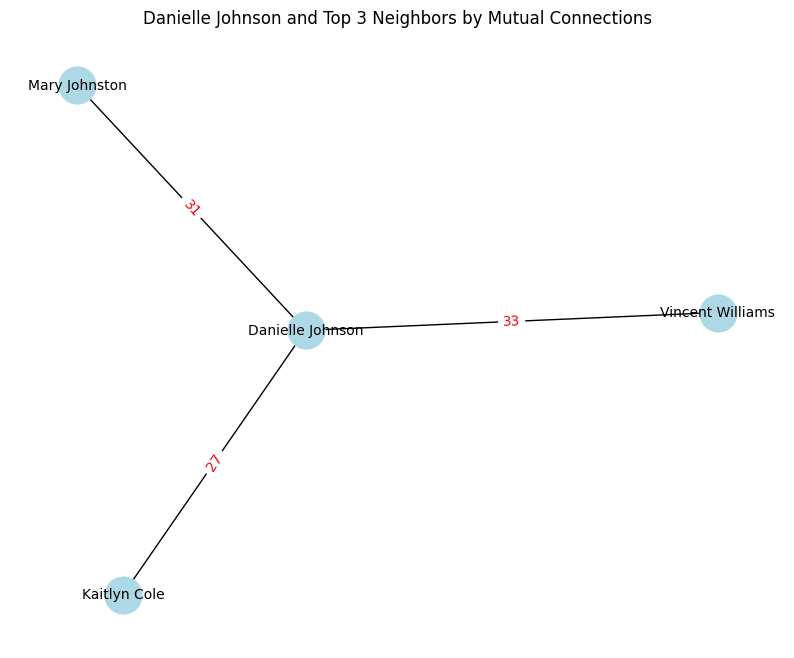

In [ ]:
# 16. Execution on Visualization Agent
query_graph("Visualize me Danielle Johnson and 3 neighbors based on mutual connections count")

In [ ]:
# 17. Execution on Job Matching Agent Query
query_graph("Can you find me career opportunities at Adept AI?")

1) Checking if the query is relevant to LinkedIn network analysis
2) Query is valid. Routing to appropriate tool using ReAct agent.
1) Analyzing job search parameters and skills
Search parameters:

    JOB_ROLE: Not specified
    SKILLS: Not specified
    EXPERIENCE_LEVEL: Not specified
    OTHER_CRITERIA: None
2) Executing hybrid job matching query
1) Analyzing query and determining execution strategy
Query Analysis:
- **STRATEGY**: HYBRID

- **REASONING**: The task involves both retrieving specific data from a graph database and performing complex analytics to rank job matches based on multiple criteria. AQL is well-suited for efficiently querying and filtering data from the graph database, such as retrieving job postings and their associated details. NetworkX, on the other hand, is ideal for performing more complex analytics, such as calculating the degree of skill match and ranking the jobs based on multiple factors. Combining both allows leveraging the strengths of each tool.

- *

"Here are some career opportunities at Adept AI that might interest you:\n\n1. **Developer Advocate**\n   - **Key Skills Required:** Perl, GitHub, Domain-Driven Design (DDD), Linear, Clojure, System Design\n   - **Description:** This senior-level position involves advocating for developers, creating technical content, and engaging with the developer community. It's a strong match for someone with a senior-level background and the specified technical skills.\n\n2. **Technical Product Manager**\n   - **Key Skills Required:** Trello, Scrum, Linear, Core ML, Swift, Java, Three.js, Redux, Clean Code\n   - **Description:** This junior-level role involves managing product development processes, coordinating with cross-functional teams, and ensuring product quality. It offers a comprehensive set of responsibilities that align with career goals in product management.\n\n3. **ML Ops Engineer**\n   - **Key Skills Required:** Pandas, Firebase, PostgreSQL, Kubernetes, Large Language Models (LLMs), 

In [ ]:
# 18. Execution on Connection Recommendation
query_graph("Give me a connection at Adept AI for me to reach out for developer associate role")

----------
FINAL_RESULT: {'strategic_individuals': [{'name': 'Angel Doyle', 'headline': 'Principal Engineer at Adept AI', 'centrality_score': 0.2735328242095499}, {'name': 'Jose Young', 'headline': 'Technical Support Engineer at Adept AI', 'centrality_score': 0.25171687496221073}, {'name': 'John Caldwell', 'headline': 'Lead Data Scientist at Adept AI', 'centrality_score': 0.2502932611238174}, {'name': 'Leah Shields', 'headline': 'Interaction Designer at Adept AI', 'centrality_score': 0.2165656600811461}, {'name': 'Christopher Williams', 'headline': 'Principal Data Scientist at Adept AI', 'centrality_score': 0.1955662785914433}], 'valuable_connections': [{'name': 'Stacey Tucker', 'headline': 'Developer Relations Engineer at Runway ML', 'centrality_score': 0.29863543276840726}, {'name': 'Alexander Valdez', 'headline': 'Developer Relations Engineer at Workday', 'centrality_score': 0.29243782787606365}, {'name': 'Matthew Clayton', 'headline': 'Developer Relations Engineer at H2O.ai', 'cent

'John Caldwell is a Lead Data Scientist at Adept AI, based in Atlanta, United States.'

In [ ]:
# 19. Execution on Outreach Message
query_graph("Can you write an outreach message to John Caldwell for Developer Associate role?")

1) Checking if the query is relevant to LinkedIn network analysis
2) Query is valid. Routing to appropriate tool using ReAct agent.
1) Extracting target information from query
Target name: John Caldwell
Outreach context: Developer Associate role
2) Retrieving profile data via AQL


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH Linkedin_node
FOR profile IN Linkedin_node
FILTER profile.first_name == "John" AND profile.last_name == "Caldwell"
RETURN {
  full_name: profile.full_name,
  linkedin_url: profile.linkedin_url,
  headline: profile.headline,
  city: profile.city,
  country: profile.country,
  location: profile.location,
  skills: profile.skills,
  summary: profile.summary,
  experience_level: profile.experience_level
}

AQL Result:
[{'full_name': 'John Caldwell', 'linkedin_url': 'https://linkedin.com/in/jcaldwell', 'headline': 'Lead Data Scientist at Adept AI', 'city': 'Atlanta', 'country': 'United States', 'location': 'Atlanta, United States', 'skills': ['Reinfor

"Here's a personalized LinkedIn outreach message for John Caldwell regarding a Developer Associate role:\n\n---\n\nHi John,\n\nI'm impressed by your work in Reinforcement Learning and GANs at Adept AI. I'm exploring a Developer Associate role and would love to connect to learn from your expertise in creating scalable, user-centric products. Looking forward to connecting!\n\nBest,  \n[Your Name]\n\n---\n\nThis message is concise, personalized, and clearly states your intent, making it effective for initiating a professional connection."

2) Query is valid. Routing to appropriate tool using ReAct agent.
1) Planning data extraction for visualization
Data extraction plan: To visualize the shortest path from Joseph White to John Caldwell in the graph, we need to extract specific data from the graph that includes both the path and the human-readable attributes. Here's a step-by-step plan to achieve this:

### Step 1: Identify the Nodes
1. **Locate the Nodes for Joseph White and John Caldwell:**
   - We need to find the nodes in the `Linkedin_node` collection where `full_name` is "Joseph White" and "John Caldwell".

### Step 2: Extract the Shortest Path
2. **Use AQL-like Query to Find the Shortest Path:**
   - We will use a graph traversal query to find the shortest path between the two nodes identified in Step 1. The query should traverse the `Linkedin_node_to_Linkedin_node` edge collection.

### Step 3: Extract Human-Readable Attributes
3. **Extract Attributes for Each Node in the Path:**
   - For each node in the path, ex

'Here is the visualization of the shortest path from Joseph White to John Caldwell in the graph. The path is highlighted in the network graph, showing the direct connections and nodes involved in the shortest route between these two individuals.'

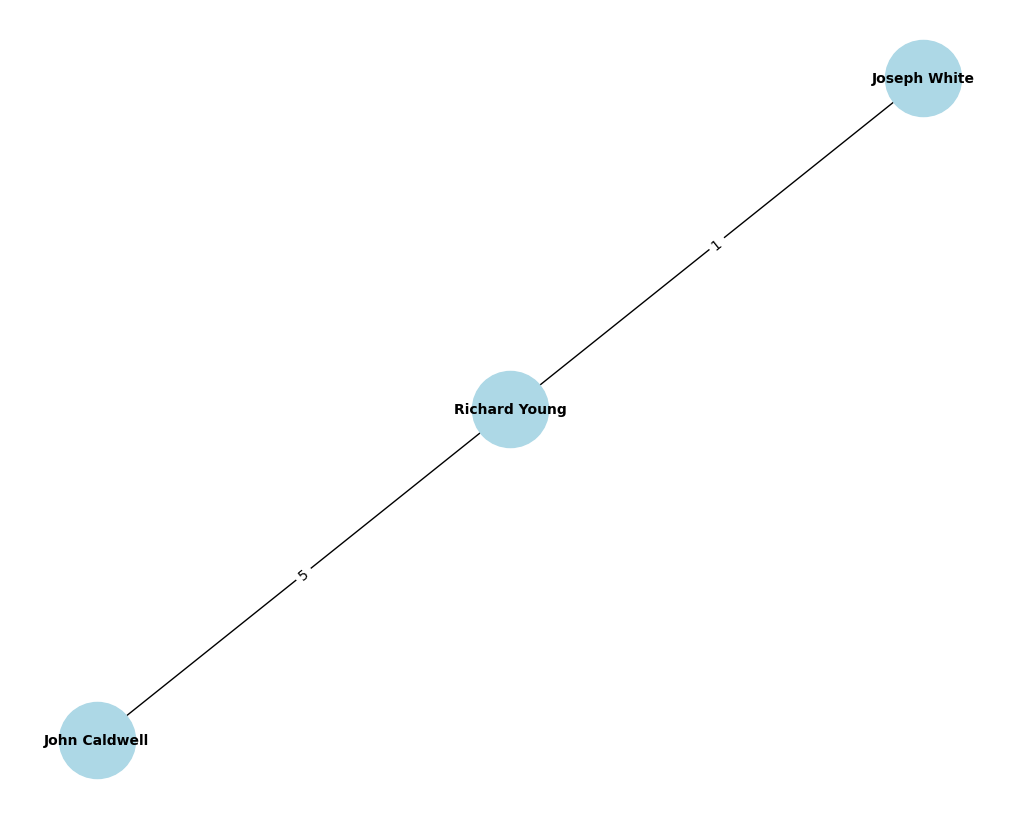

In [ ]:
# 20. Execution on Visualization Agent
query_graph("I am Joseph White. I want to reach John Caldwell. Can you visualize me the shortest path?")

In [ ]:
# 21. Execution on Outreach Message
query_graph("Can you write an outreach message to Richard Young to help me connect to John Caldwell?")

2) Query is valid. Routing to appropriate tool using ReAct agent.
1) Extracting target information from query
Target name: Richard Young
Outreach context: To help connect with John Caldwell for a referral at Adept AI.
2) Retrieving profile data via AQL


> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH Linkedin_node
FOR profile IN Linkedin_node
    FILTER profile.first_name == "Richard" AND profile.last_name == "Young"
    RETURN {
        full_name: profile.full_name,
        linkedin_url: profile.linkedin_url,
        headline: profile.headline,
        city: profile.city,
        country: profile.country,
        location: profile.location,
        skills: profile.skills,
        summary: profile.summary,
        experience_level: profile.experience_level
    }

AQL Result:
[{'full_name': 'Richard Young', 'linkedin_url': 'https://linkedin.com/in/young.r', 'headline': 'Senior Software Engineer at Cisco', 'city': 'Dublin', 'country': 'Ireland', 'location': 'Dublin, Irela

"Here's a personalized LinkedIn outreach message you can use to connect with Richard Young:\n\n---\n\nHi Richard,\n\nI'm impressed by your expertise in Rust and Microservices at Cisco. I'm seeking a referral to Adept AI and would appreciate your insights or connection with John Caldwell. Let's connect and explore potential synergies. Thank you!\n\n---\n\nThis message is concise and respectful, with a character count of 221, making it suitable for LinkedIn's messaging limits."